# Harmonization Parameters Finder

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Read Data

In [60]:
def read_sensor_data(file_prefix, num_sensors=15,api=False):
    
    if api:
        # file_prefix = 'tsi_v3_api/telemetry_outputs/Raw_Edited.csv'
        df = pd.read_csv(file_prefix)
        # Group by 'model' and create a dictionary of DataFrames
        model_dfs = {}
        sensor_dataframes = []
        for model, group in df.groupby('friendly_name'):
            model_dfs[model] = group

        rename_dict = {
                'PM1.0 (ug/m3)': 'PM 1.0',
                'PM2.5 (ug/m3)': 'PM 2.5',
                'PM4.0 (ug/m3)': 'PM 4.0',
                'PM10 (ug/m3)': 'PM 10',
                'PM0.5 NC (#/cm3)': 'NC 0.5',
                'PM1.0 NC (#/cm3)': 'NC 1.0',
                'PM2.5 NC (#/cm3)': 'NC 2.5',
                'PM4.0 NC (#/cm3)': 'NC 4.0',
                'PM10 NC (#/cm3)': 'NC 10',
                'Typical Particle Size (um)': 'Typical Particle Size',
                'Temperature (Celsius)': 'Temperature',
                'Relative Humidity (%)': 'Relative Humidity',
                'timestamp' : 'Timestamp'
        }
        # Access individual DataFrames
        for keys in model_dfs.keys():
            # print(f"DataFrame for Model {model}:")
            # print(model_df)
                
            model_dfs[keys] = model_dfs[keys].rename(columns=rename_dict)
            # print("\n")
            sensor_dataframes.append(model_dfs[keys])
        return sensor_dataframes
        
    else:
        sensor_dataframes = []
        for i in range(1, num_sensors + 1):
            filename = f'{file_prefix}{i:02d}.csv'
            sensor_df = pd.read_csv(filename)
            sensor_dataframes.append(sensor_df)
        return sensor_dataframes

sensor_dataframes = read_sensor_data('data/Jun1-Jun7/Indoor')

# Getting Data from Darrens Code

In [10]:
# https://stackoverflow.com/questions/75048986/way-to-temporarily-change-the-directory-in-python-to-execute-code-without-affect

import contextlib


@contextlib.contextmanager
def new_cd(x):
    d = os.getcwd()

    # This could raise an exception, but it's probably
    # best to let it propagate and let the caller
    # deal with it, since they requested x
    os.chdir(x)

    try:
        yield

    finally:
        # This could also raise an exception, but you *really*
        # aren't equipped to figure out what went wrong if the
        # old working directory can't be restored.
        os.chdir(d)

In [11]:
from tsi_v3_api.get_all_raw_data import device_list, client_token, main, get_and_flatten_telemetry

work_dir = r'tsi_v3_api/'

# with os.chdir(work_dir):
with new_cd(work_dir):

    from tsi_v3_api.get_all_raw_data import device_list, client_token, main, get_and_flatten_telemetry
    secrets_PATH = r'account_auth_info/secrets.csv'
    main(secrets_PATH, days_duration=2)

Token for nn12@duke.edu is ready
1   nn12@duke.edu   81432150005   Kenya 3 (N)
2   nn12@duke.edu   81442326006   Indoor 01
3   nn12@duke.edu   81442326017   Indoor 03
4   nn12@duke.edu   81442326015   Indoor 04
5   nn12@duke.edu   81442326013   Indoor 05
6   nn12@duke.edu   81442326005   Indoor 06
7   nn12@duke.edu   81442326003   Indoor 02
8   nn12@duke.edu   81442326001   Indoor 07
9   nn12@duke.edu   81442326008   Indoor 08
10   nn12@duke.edu   81442326014   Indoor 09
11   nn12@duke.edu   81442326007   Indoor 10
12   nn12@duke.edu   81442325013   Indoor 11
13   nn12@duke.edu   81442326016   Indoor 12
14   nn12@duke.edu   81442326009   Indoor 13
15   nn12@duke.edu   81442326018   Indoor 14
16   nn12@duke.edu   81442326002   Indoor 15
17   nn12@duke.edu   81432151042   Kenya 2
18   nn12@duke.edu   81432151052   Kenya 1
Device list is successfully updated.
Merged raw csv successfully compiled.
Level 0 QA completed


/Users/rishabhshah/Desktop/Final_Bergin/Kenya-Indoor-Sensors/tsi_v3_api/get_all_raw_data.py:501: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df['time_delta'] = raw_df.sort_values('timestamp').groupby('serial')['timestamp'].diff().fillna(method='bfill')
/Users/rishabhshah/Desktop/Final_Bergin/Kenya-Indoor-Sensors/tsi_v3_api/get_all_raw_data.py:501: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df['time_delta'] = raw_df.sort_values('timestamp').groupby('serial')['timestamp'].diff().fillna(method='bfill')


Level 1 QA completed
Data processing and quality assurance completed.


In [12]:
# # Add relavant details to secrets

# work_dir = r'tsi_v3_api/'
# os.chdir(work_dir)
# secrets_PATH = r'account_auth_info/secrets.csv'
# main(secrets_PATH,True)

In [13]:
file_prefix = 'tsi_v3_api/telemetry_outputs/Raw_Edited.csv'
sensor_dataframes = read_sensor_data(file_prefix,api=True)

In [19]:
sensor_dataframes[0].to_csv('tsi_v3_api/telemetry_outputs/test.csv')

In [12]:
def read_sensor_data(file_prefix, num_sensors=15):
    sensor_dataframes = []
    for i in range(1, num_sensors + 1):
        filename = f'data/May25-May31/{file_prefix}{i:02d}.csv'
        sensor_df = pd.read_csv(filename)
        sensor_dataframes.append(sensor_df)
    return sensor_dataframes

sensor_dataframes = read_sensor_data('Indoor')

## Clean Data

In [61]:
# def create_units_dict(df):
#     units_dict = {}
#     for column in df.columns:
#         units_dict[column] = df.loc[0, column]
#     return units_dict

# units_dict = create_units_dict(sensor_dataframes[0])

units_dict = {'Timestamp': 'UTC',
 'Timestamp (Local)': 'UTC-05:00',
 'PM 1.0': 'ug/m3',
 'PM 2.5': 'ug/m3',
 'Applied PM 2.5 Custom Calibration Setting - Multiplication Factor': None,
 'Applied PM 2.5 Custom Calibration Setting - Offset': None,
 'PM 4.0': 'ug/m3',
 'PM 10': 'ug/m3',
 'Applied PM 10 Custom Calibration Setting - Multiplication Factor': None,
 'Applied PM 10 Custom Calibration Setting - Offset': None,
 'NC 0.5': '#/cm3',
 'NC 1.0': '#/cm3',
 'NC 2.5': '#/cm3',
 'NC 4.0': '#/cm3',
 'NC 10': '#/cm3',
 'PM Sensor Error Status': None,
 'CO2': 'ppm',
 'Applied CO2 Custom Calibration Setting - Multiplication Factor': None,
 'Applied CO2 Custom Calibration Setting - Offset': None,
 'CO2 Sensor Error Status': None,
 'CH2O': 'ppb',
 'Applied CH2O Custom Calibration Setting - Multiplication Factor': None,
 'Applied CH2O Custom Calibration Setting - Offset': None,
 'CH2O Sensor Error Status': None,
 'Barometric Pressure': 'inHg',
 'Applied Barometric Pressure Custom Calibration Setting - Offset': None,
 'Barometric Sensor Error Status': None,
 'CO': 'ppm',
 'Applied CO Custom Calibration Setting - Multiplication Factor': None,
 'Applied CO Custom Calibration Setting - Offset': None,
 'CO Sensor Error Status': None,
 'SO2': 'ppb',
 'Applied SO2 Custom Calibration Setting - Multiplication Factor': None,
 'Applied SO2 Custom Calibration Setting - Offset': None,
 'SO2 Sensor Error Status': None,
 'O3': 'ppb',
 'Applied O3 Custom Calibration Setting - Multiplication Factor': None,
 'Applied O3 Custom Calibration Setting - Offset': None,
 'O3 Sensor Error Status': None,
 'NO2': 'ppb',
 'Applied NO2 Custom Calibration Setting - Multiplication Factor': None,
 'Applied NO2 Custom Calibration Setting - Offset': None,
 'NO2 Sensor Error Status': None,
 'VOC tVOC measurement': 'mg/m3',
 'Applied TVOC Custom Calibration Setting - Multiplication Factor': None,
 'Applied TVOC Custom Calibration Setting - Offset': None,
 'VOC Ethanol': 'ppb',
 'VOC Sensor Error Status': None,
 'Temperature': 'Fahrenheit',
 'Applied Temperature Custom Calibration Setting - Offset': 'Celsius',
 'Relative Humidity': '%',
 'Applied Relative Humidity Custom Calibration Setting - Offset': None,
 'Temperature/Humidity Sensor Error Status': None,
 'Device Status': None}

In [62]:
# Sensor names for mapping
sensor_names = ['sensor01', 'sensor02', 'sensor03', 'sensor04', 'sensor05', 
                'sensor06', 'sensor07', 'sensor08', 'sensor09', 'sensor10',
                'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15']

def clean_sensor_dataframes(sensor_dataframes):
    numeric_columns = ['PM 1.0', 'PM 2.5', 'PM 4.0', 'PM 10',
                       'NC 0.5', 'NC 1.0', 'NC 2.5', 'NC 10',
                       'CO2', 'Barometric Pressure', 'VOC tVOC measurement',
                       'VOC Ethanol', 'Temperature', 'Relative Humidity']
    cleaned_dataframes = []
    for sensor_df, sensor_name in zip(sensor_dataframes, sensor_names):
        # Assign sensor name to each dataframe
        sensor_df['Sensor'] = sensor_name
        # Remove header (if applicable)
        sensor_df = sensor_df.iloc[1:]
        # Sort by 'Timestamp'
        sensor_df = sensor_df.sort_values(by=['Timestamp']).reset_index(drop=True)
        # Change 'Timestamp' to date format
        sensor_df['Timestamp'] = pd.to_datetime(sensor_df['Timestamp'])
        # Convert specified columns to numeric
        sensor_df[numeric_columns] = sensor_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
        # Append the cleaned DataFrame to the list
        cleaned_dataframes.append(sensor_df)
    return cleaned_dataframes

cleaned_sensor_dataframes = clean_sensor_dataframes(sensor_dataframes)

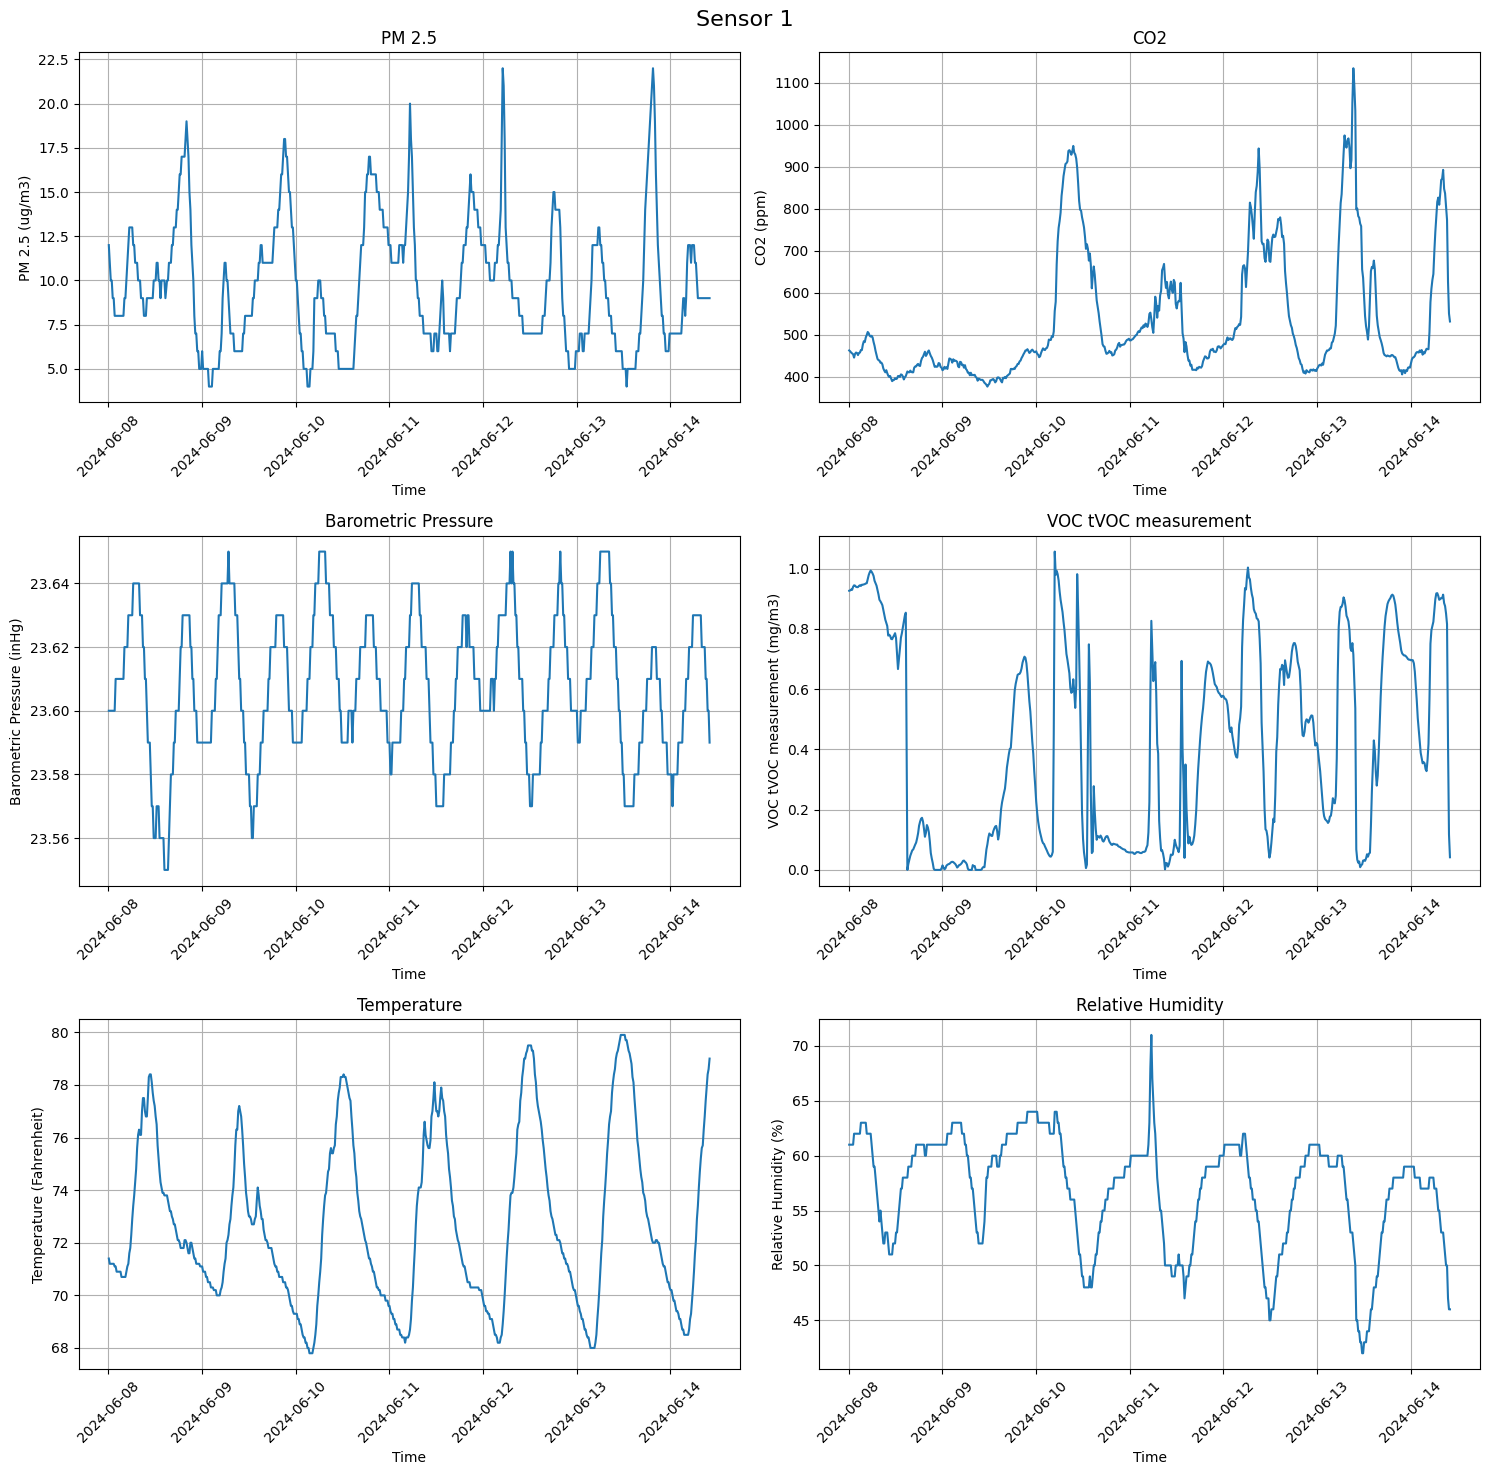

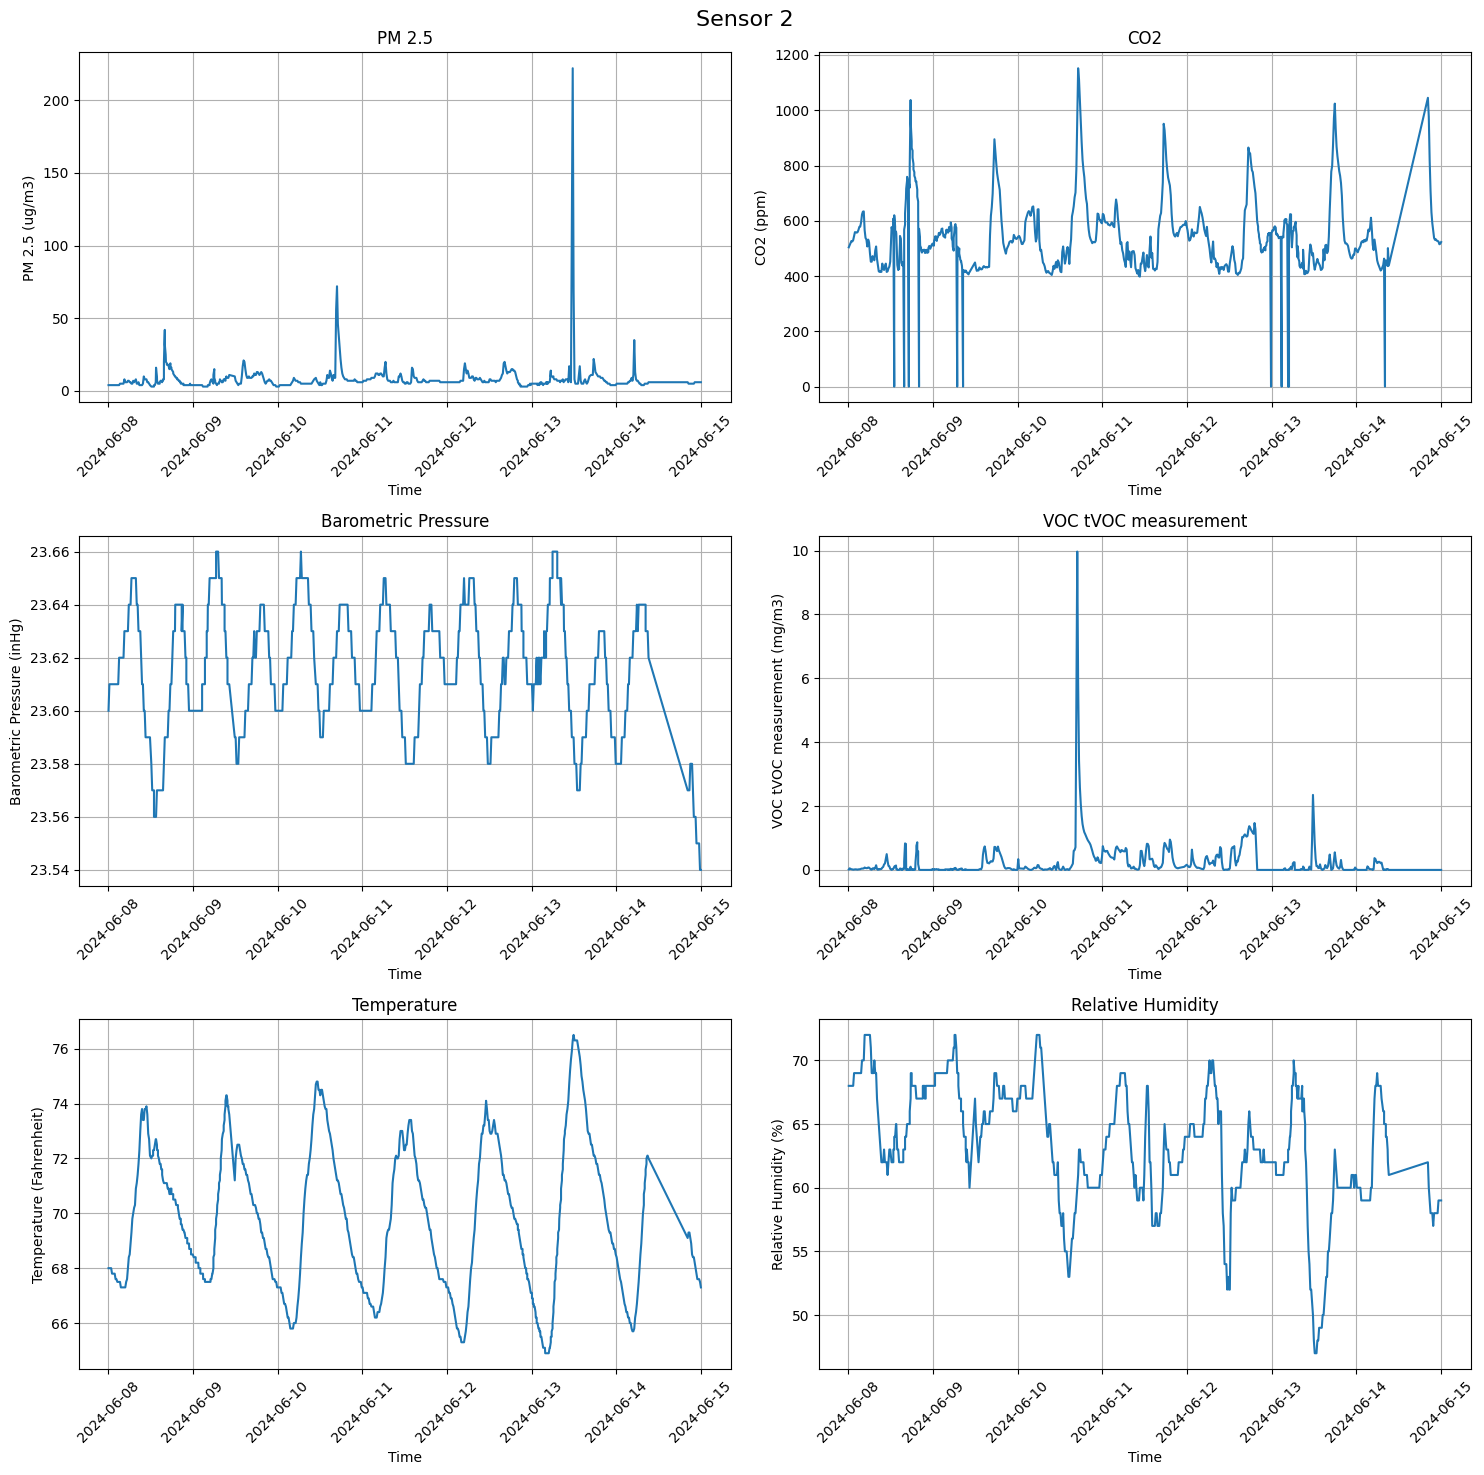

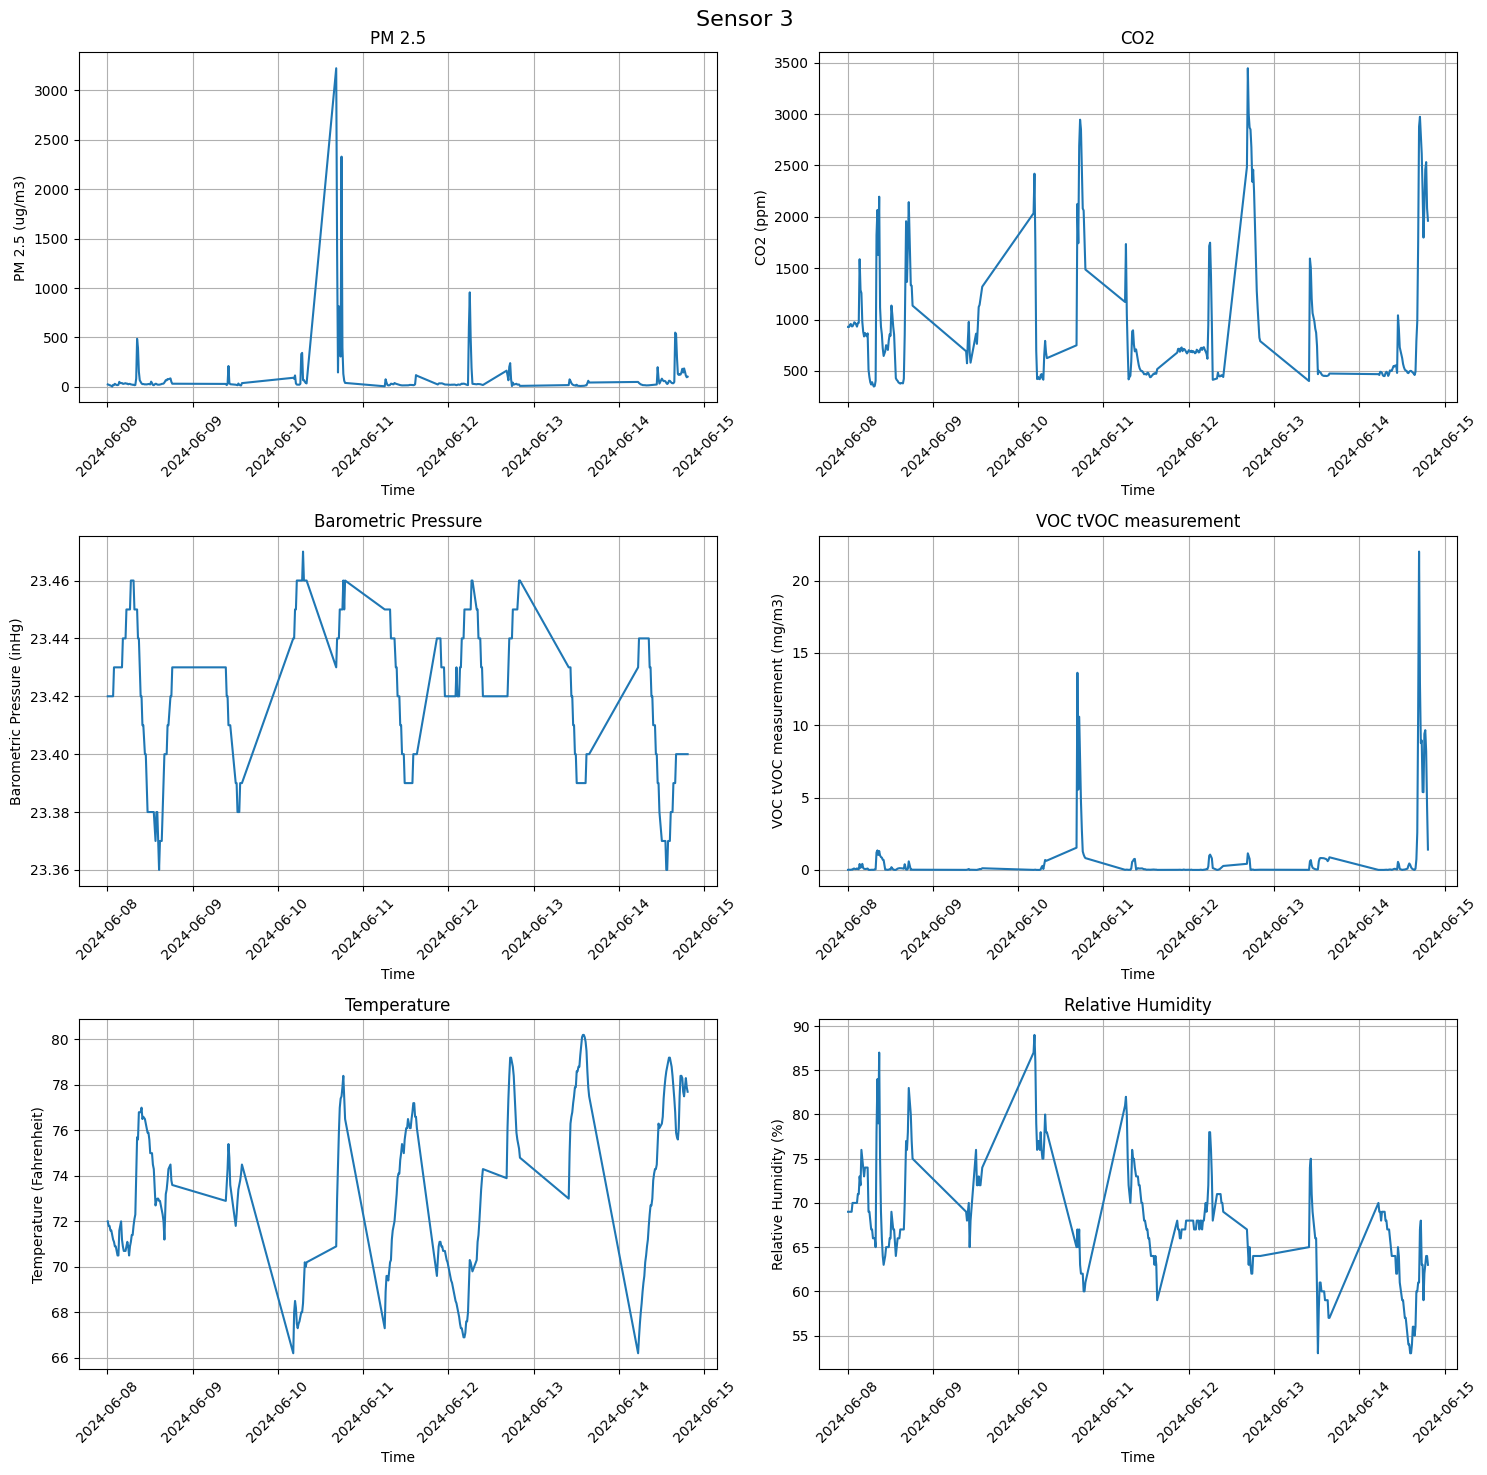

KeyboardInterrupt: 

In [55]:
# Define columns to plot
working_columns = ['PM 2.5', 'CO2', 'Barometric Pressure', 'VOC tVOC measurement', 'Temperature', 'Relative Humidity']

num_plots_per_row = 2
for sensor_num, df in enumerate(cleaned_sensor_dataframes):
    num_columns = len(working_columns)
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.suptitle(f"Sensor {sensor_num + 1}", fontsize=16)

    for i, column in enumerate(working_columns):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].plot(df['Timestamp'], df[column])
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column} ({units_dict[column]})')
        axs[row, col].grid(True)
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

### Apply Harmonization

In [56]:
parameters_dir = "parameters"

updated_dataframes = []  

for sensor_df in cleaned_sensor_dataframes:
    for column_name in working_columns:
        # Prepare the path to the coefficients file
        file_name = f"{column_name.lower().replace(' ', '_')}_coefficients_df.csv"
        coefficients_file = os.path.join(parameters_dir, file_name)
        
        # Read the coefficients data
        if os.path.exists(coefficients_file):
            coefficients_df = pd.read_csv(coefficients_file)
            
            # Rename the columns dynamically to prevent overwriting
            coefficients_df.rename(columns={'Coefficient': f'{column_name}_Coefficient',
                                            'Intercept': f'{column_name}_Intercept'}, inplace=True)
            
            # Merge the current sensor DataFrame with the coefficients DataFrame
            merged_df = pd.merge(sensor_df, coefficients_df, on='Sensor', how='left')
            
            # Apply the calibration using the dynamically named coefficients and intercepts
            merged_df[column_name] = merged_df[column_name] * merged_df[f'{column_name}_Coefficient'] + merged_df[f'{column_name}_Intercept']
            
            # Drop the dynamically named coefficient and intercept columns after use to clean up
            merged_df.drop(columns=[f'{column_name}_Coefficient', f'{column_name}_Intercept'], inplace=True)
            
            # Update sensor_df for next iteration
            sensor_df = merged_df
        else:
            print(f"Warning: No coefficients file found for {file_name}")
    
    # Append the fully updated DataFrame to the new list
    updated_dataframes.append(sensor_df)

# Replace the original dataframes list with the updated one
cleaned_sensor_dataframes = updated_dataframes


### Plot

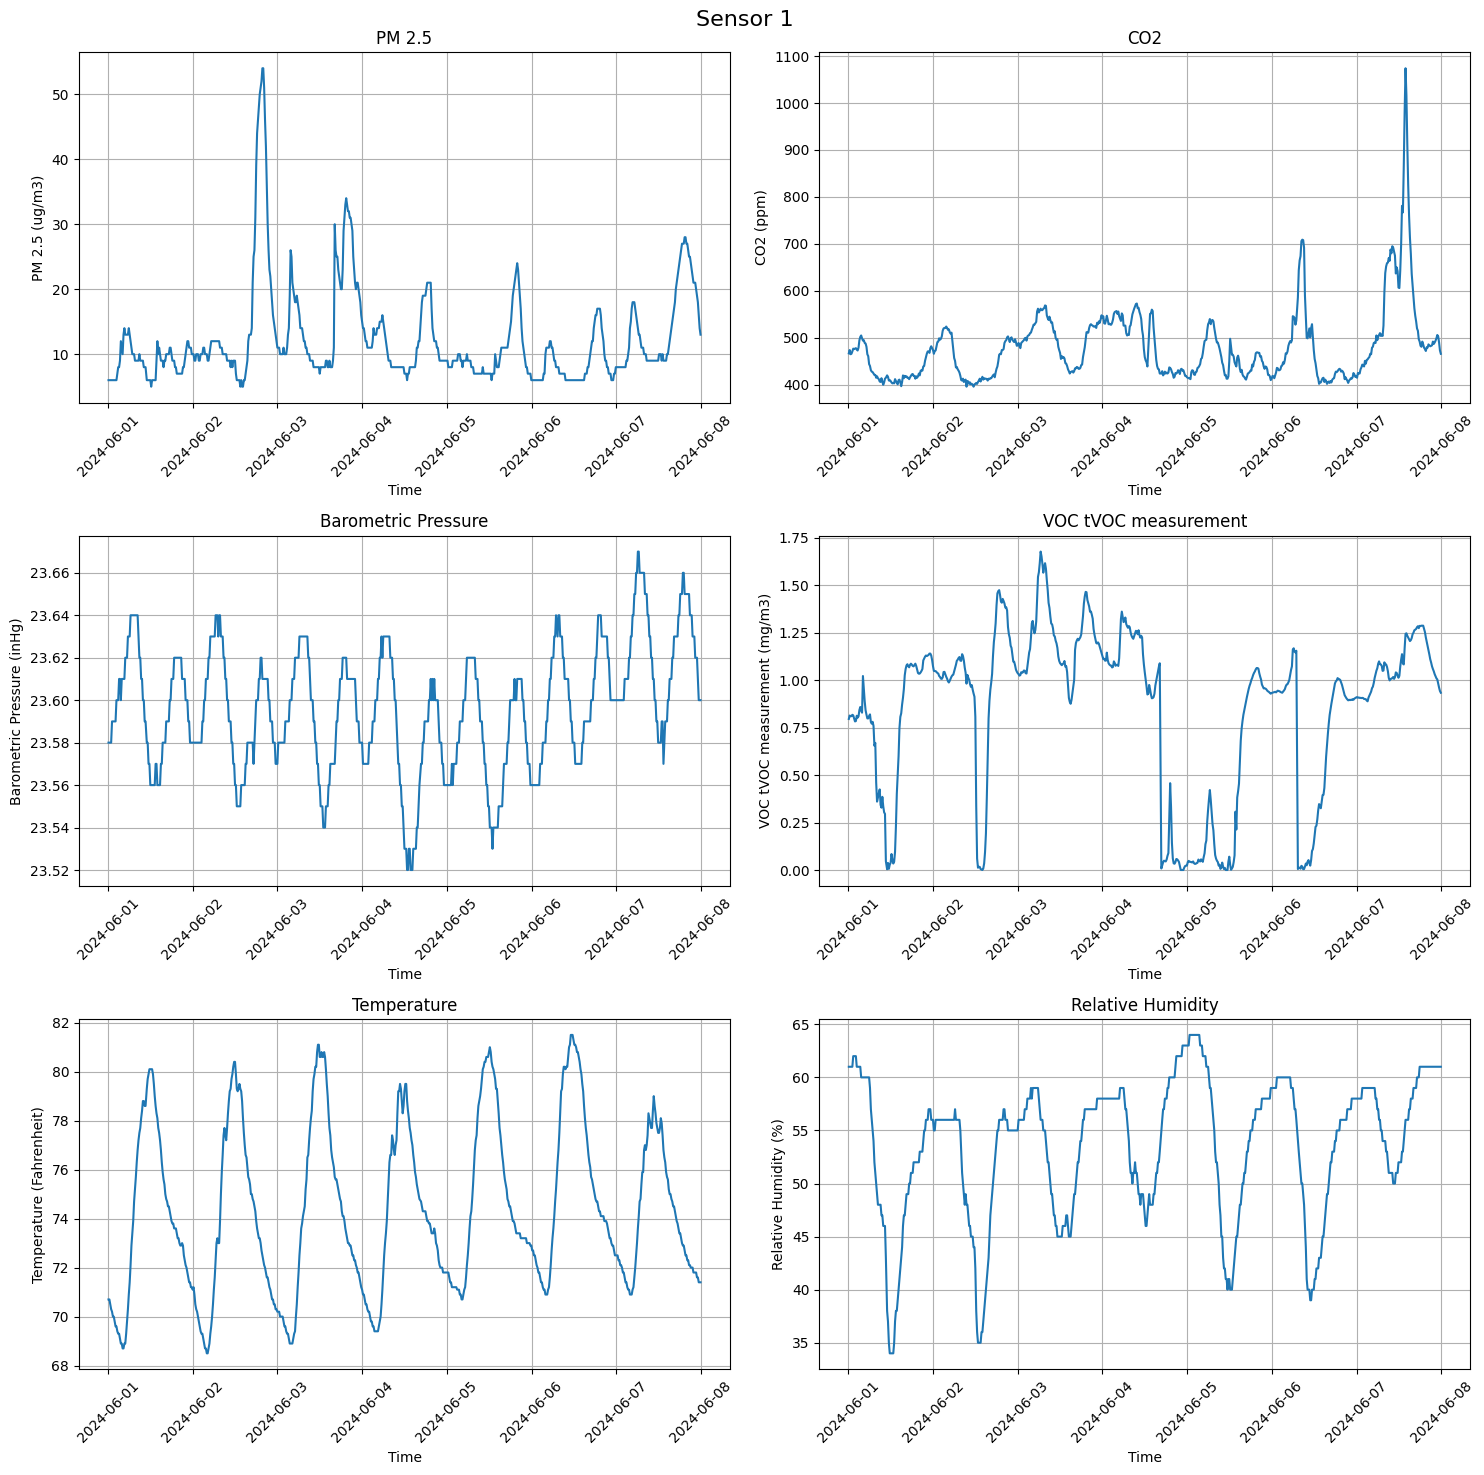

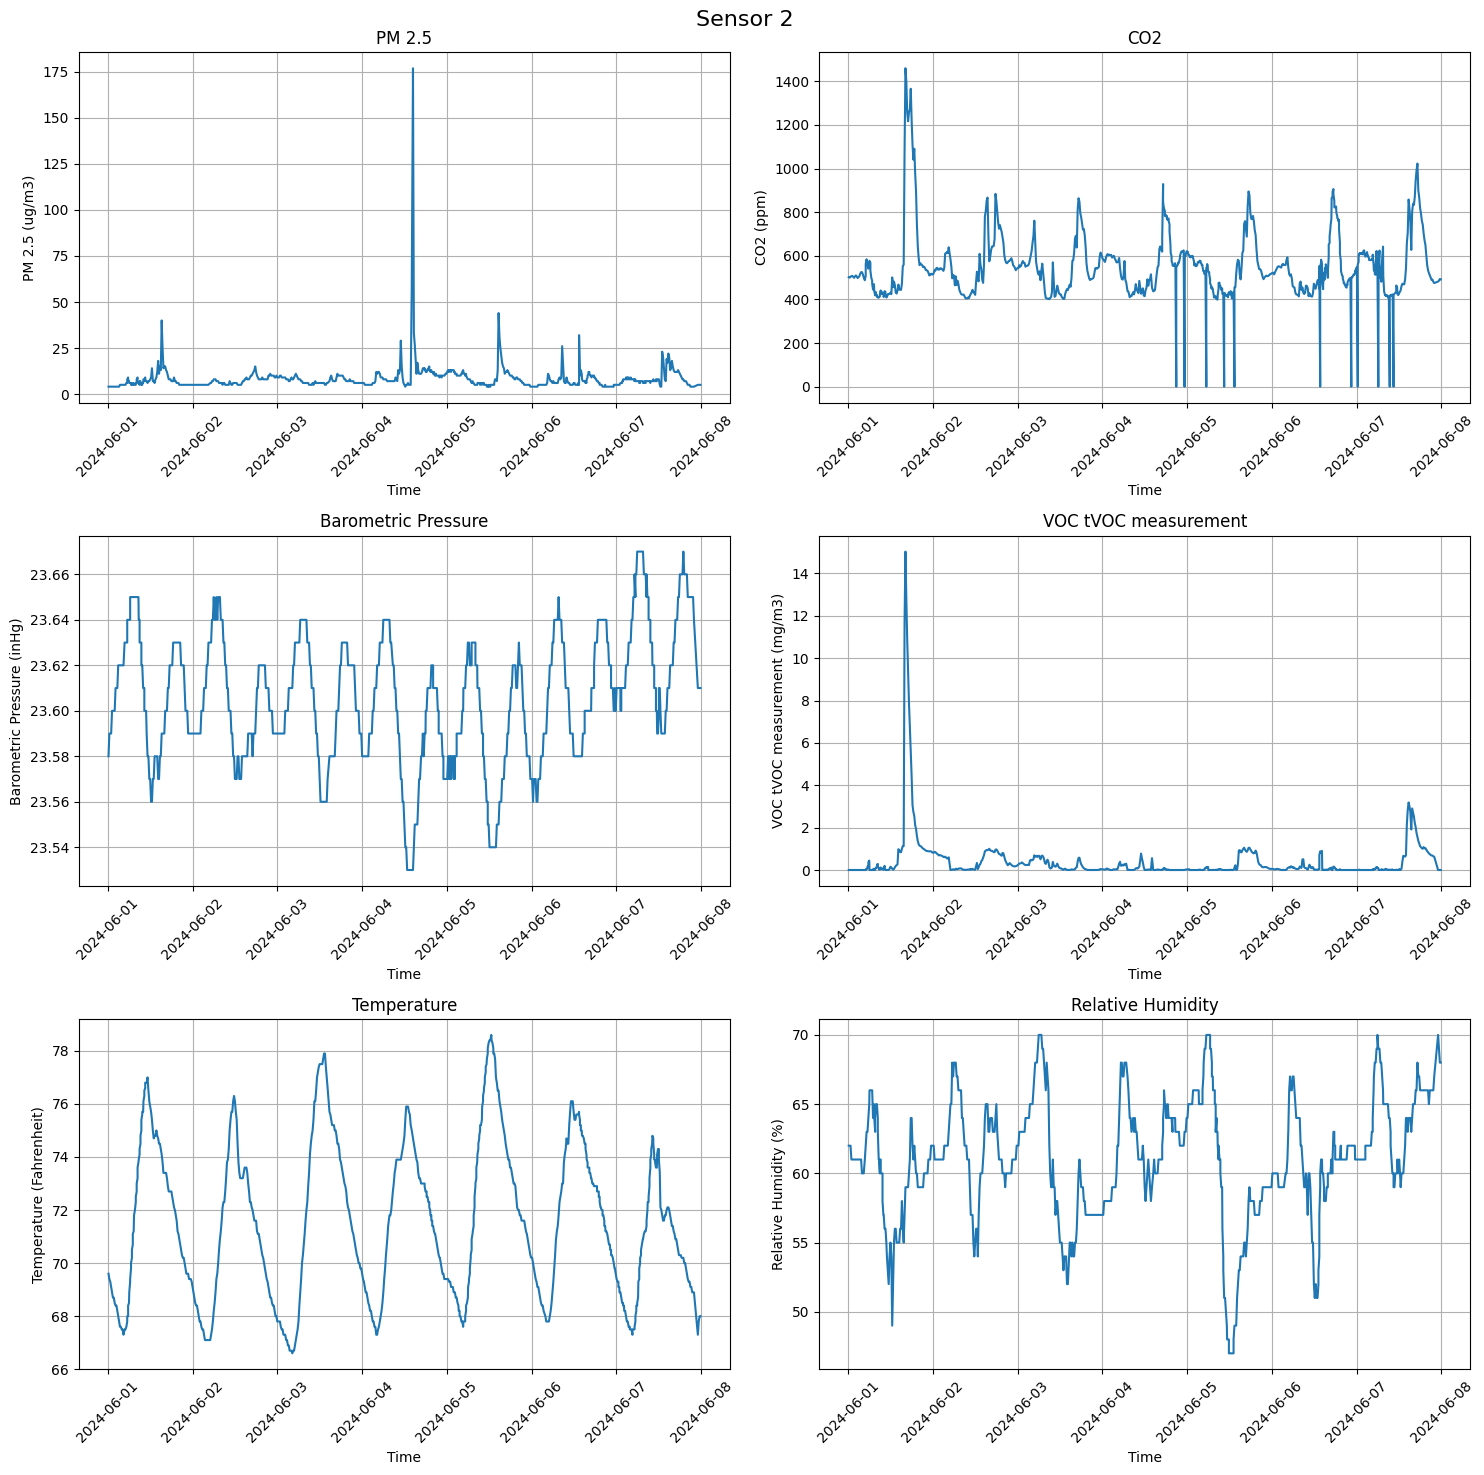

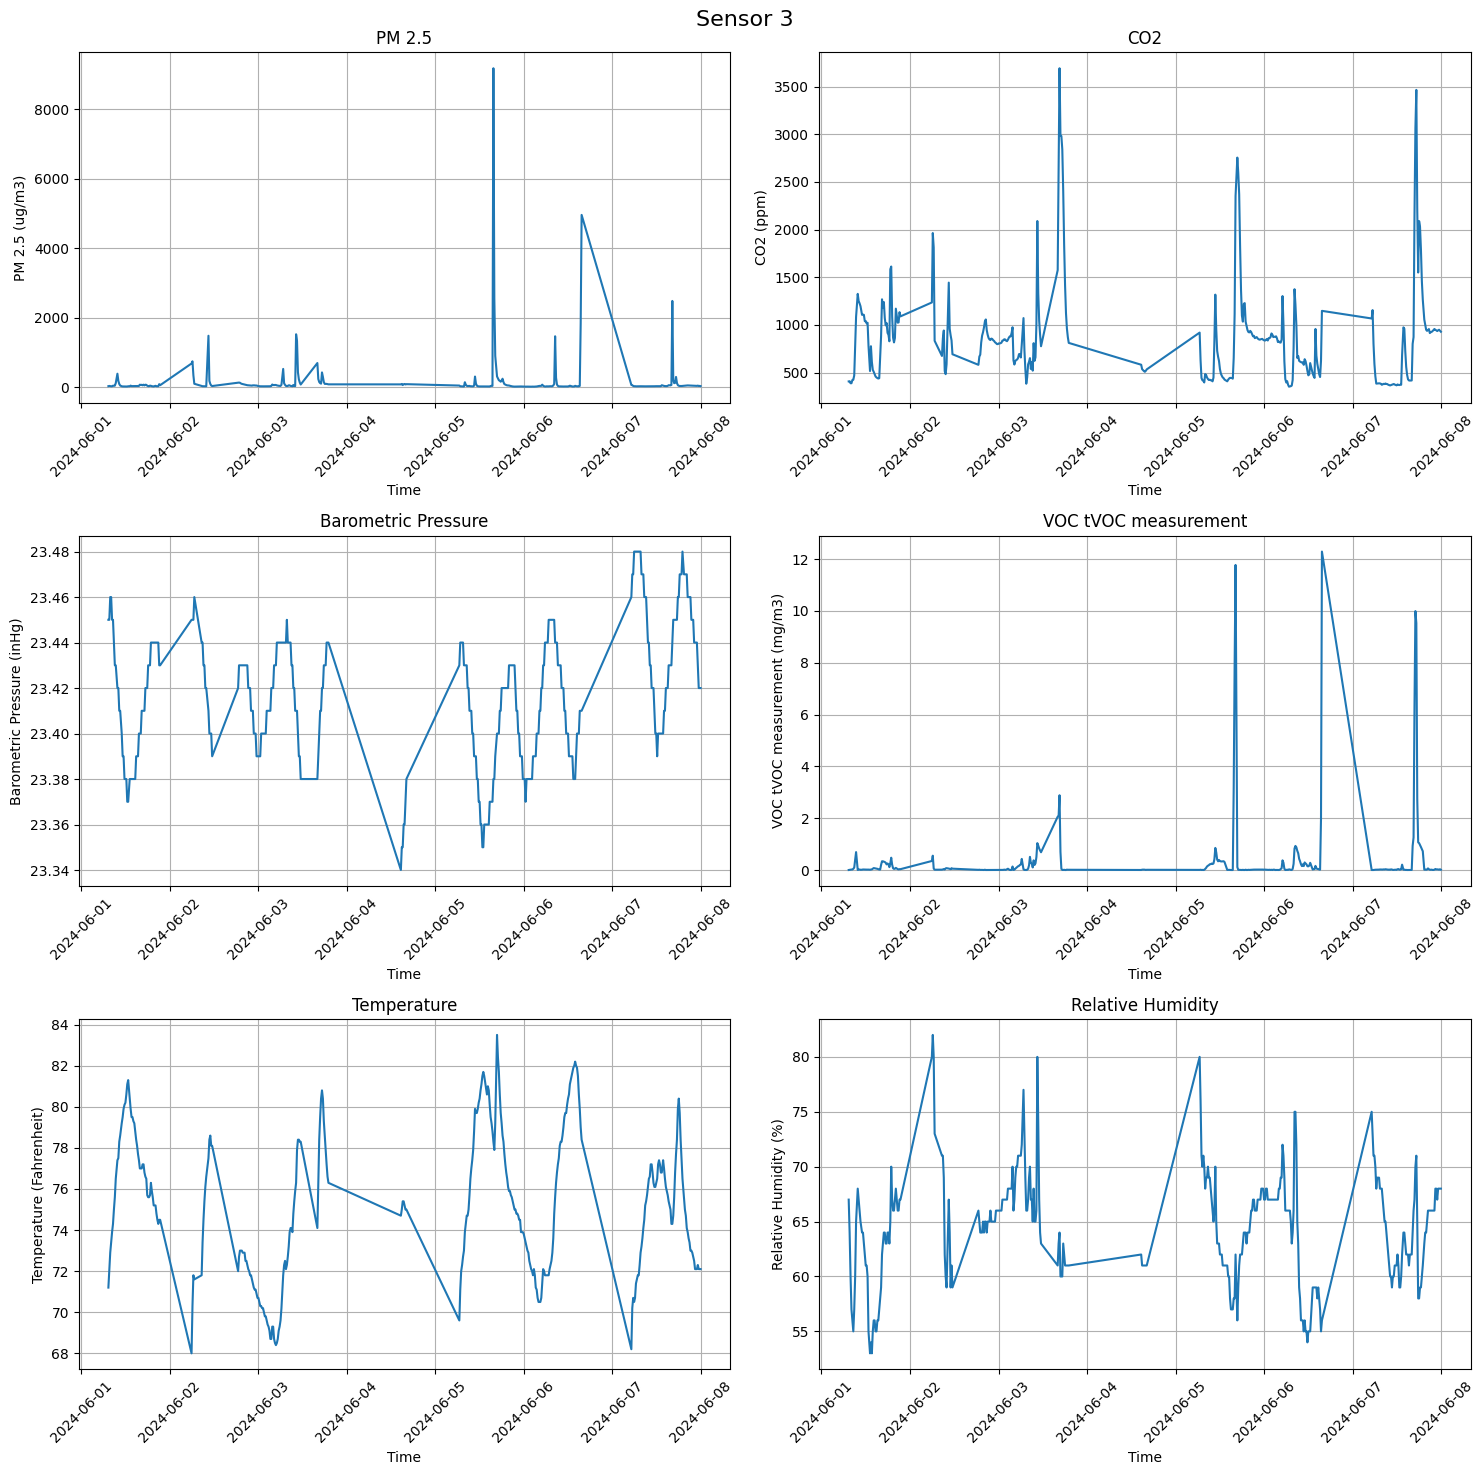

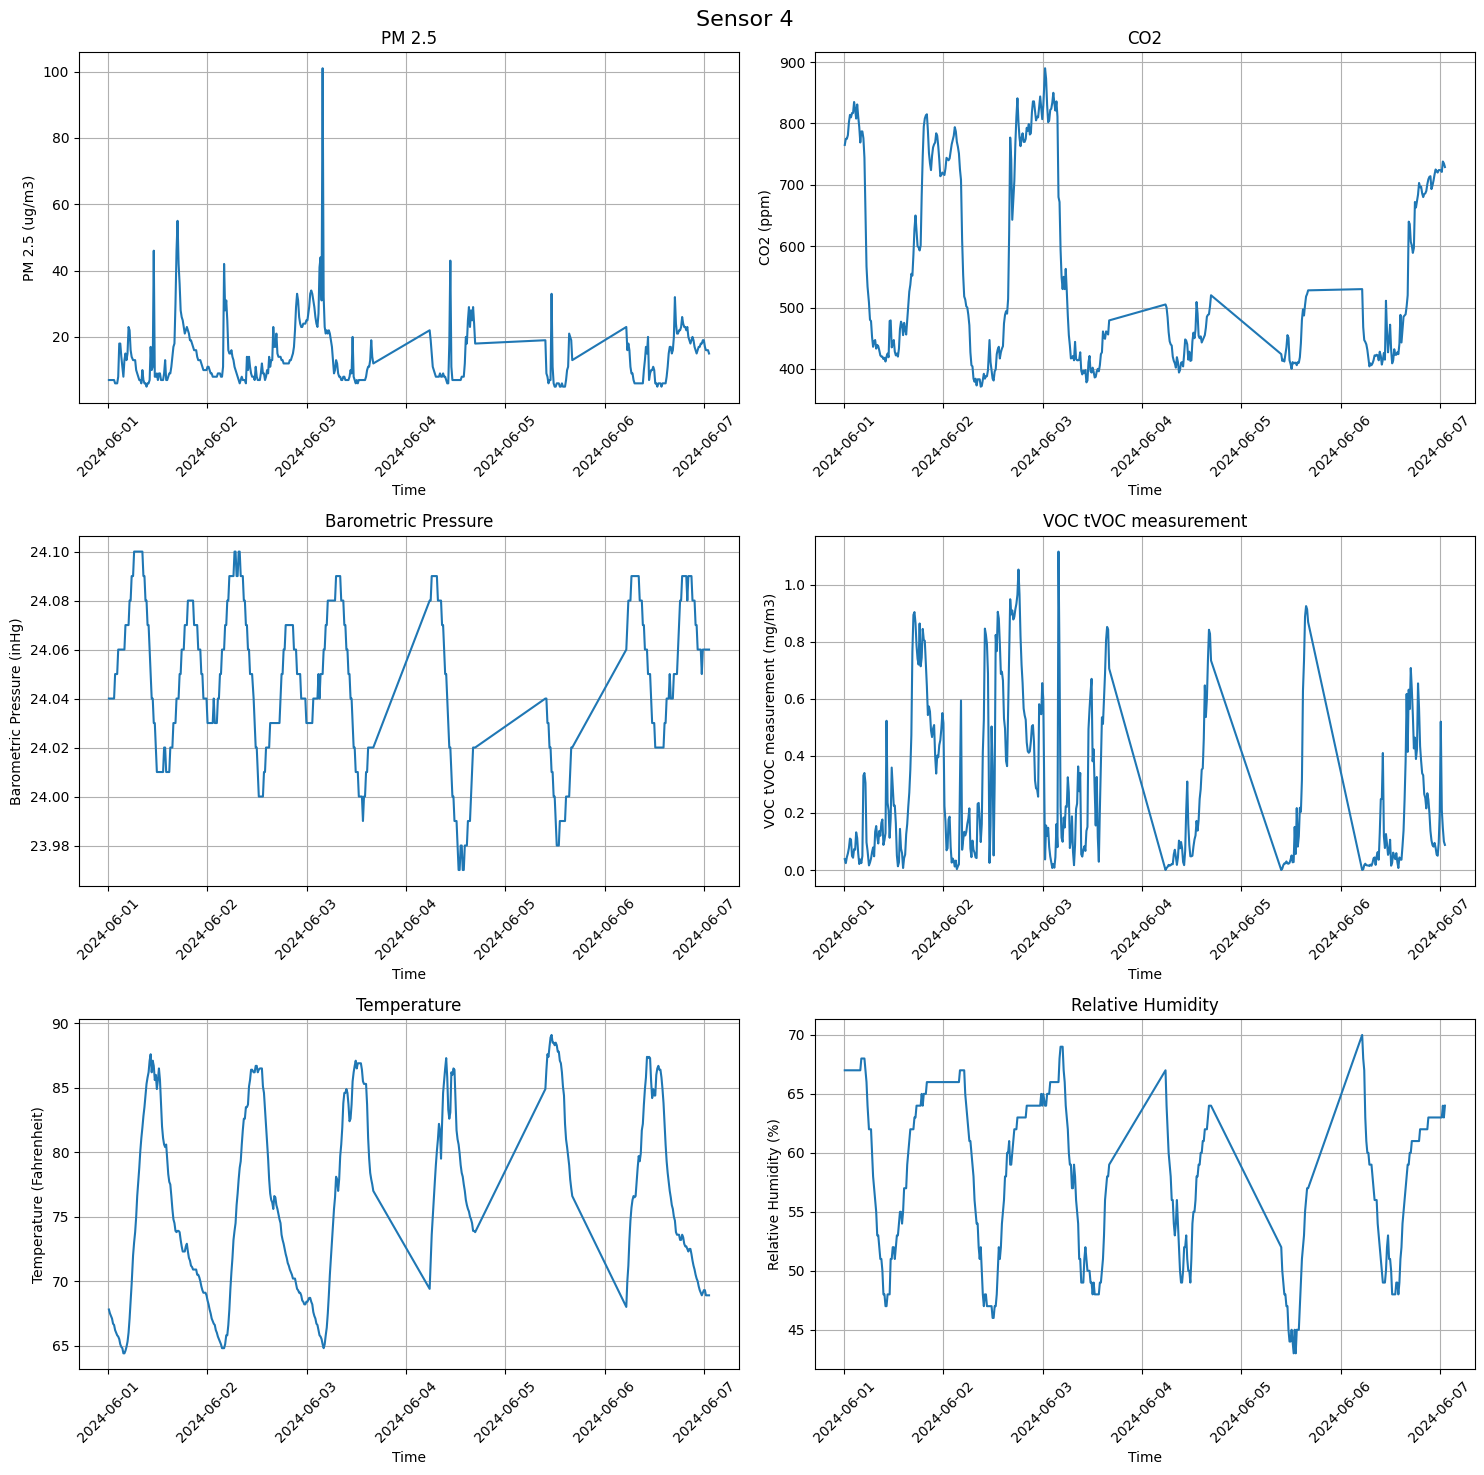

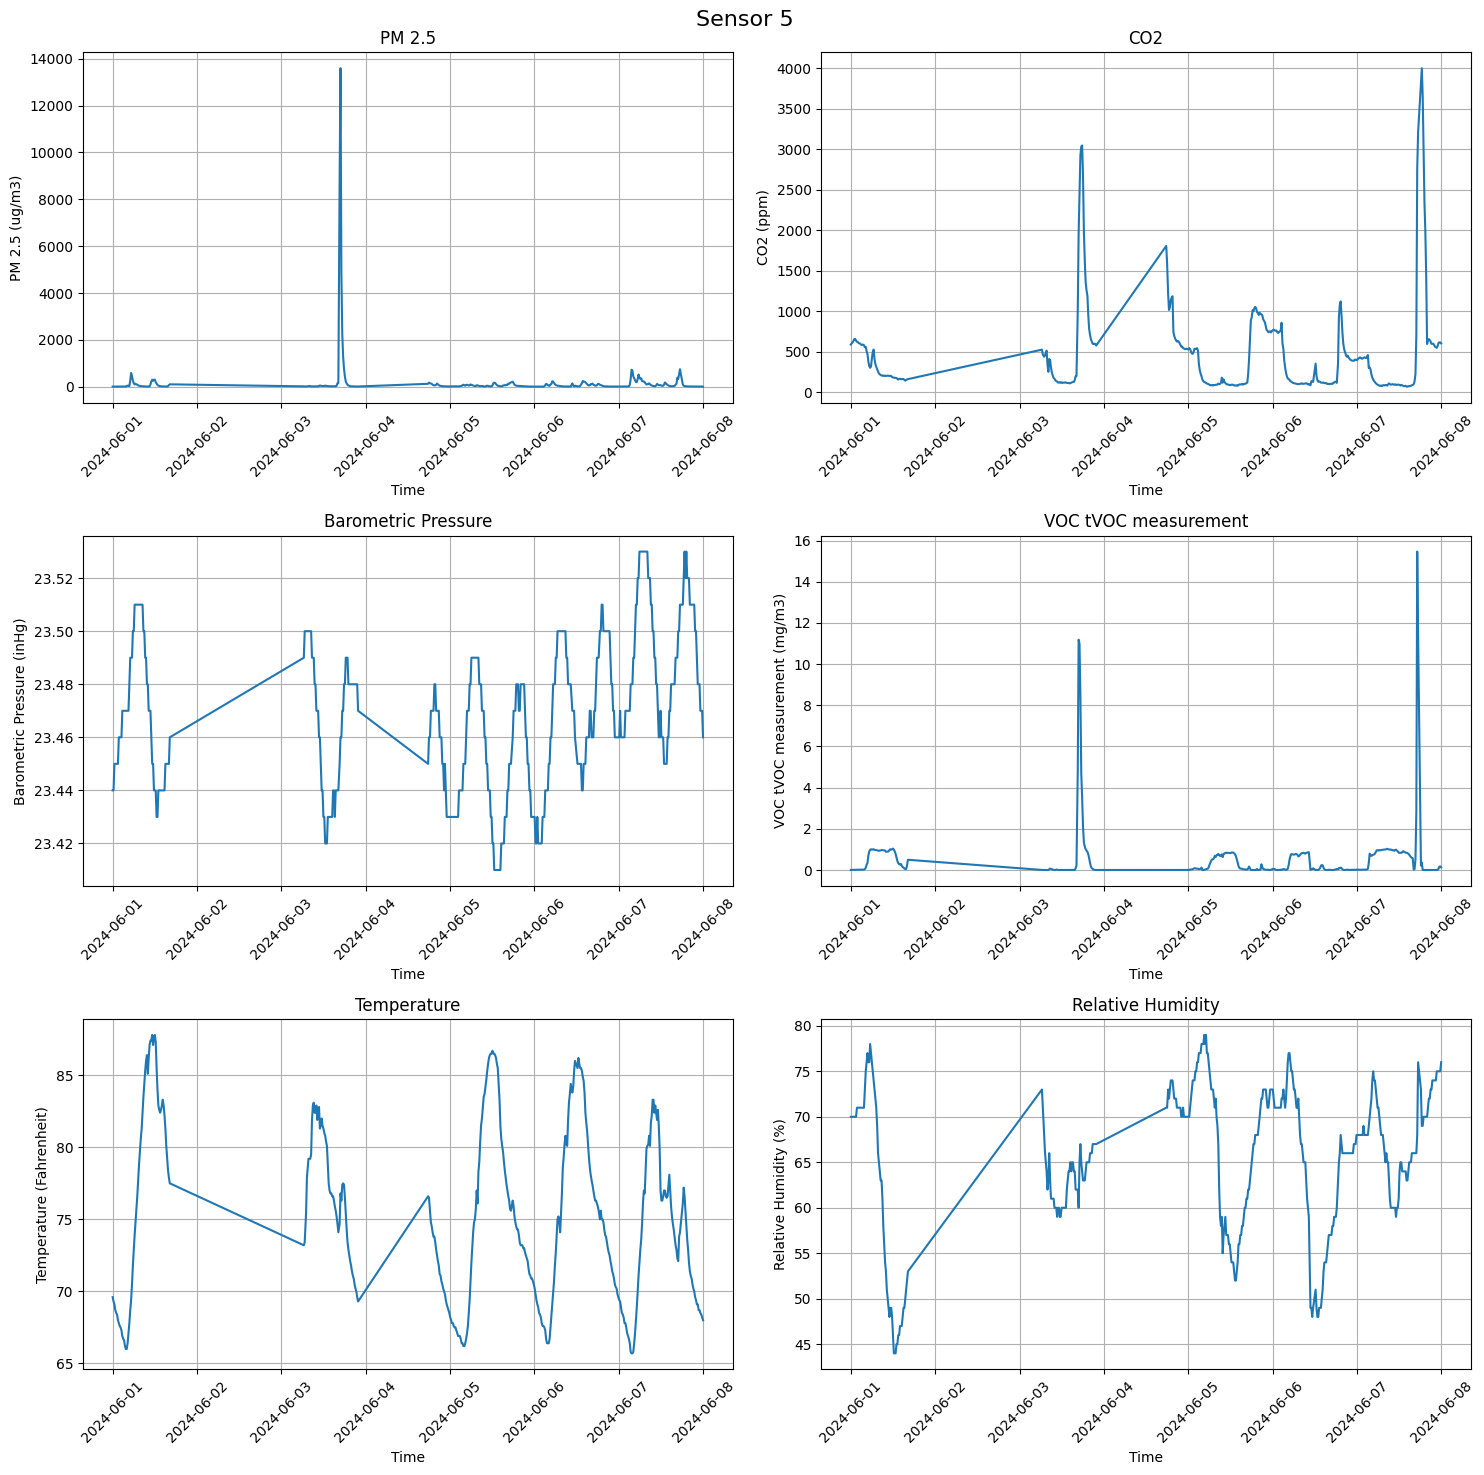

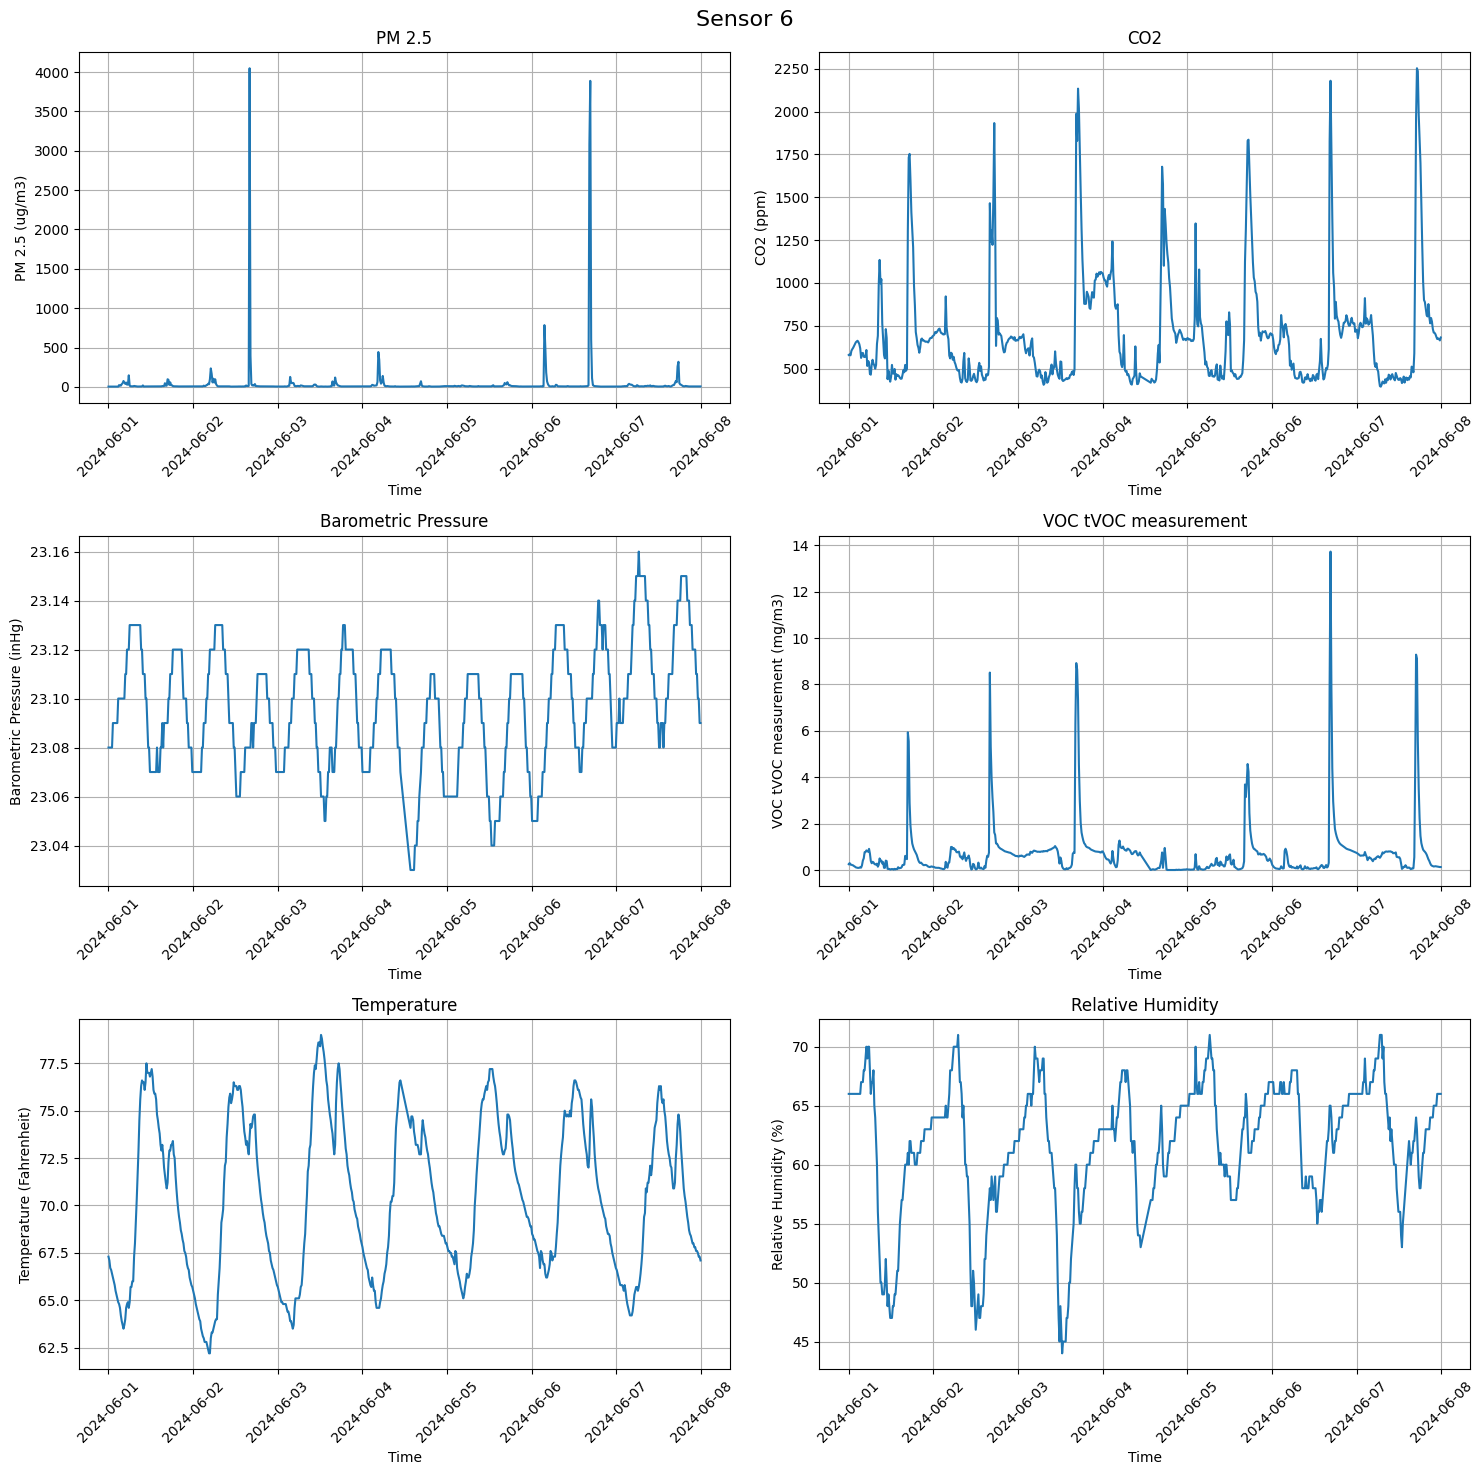

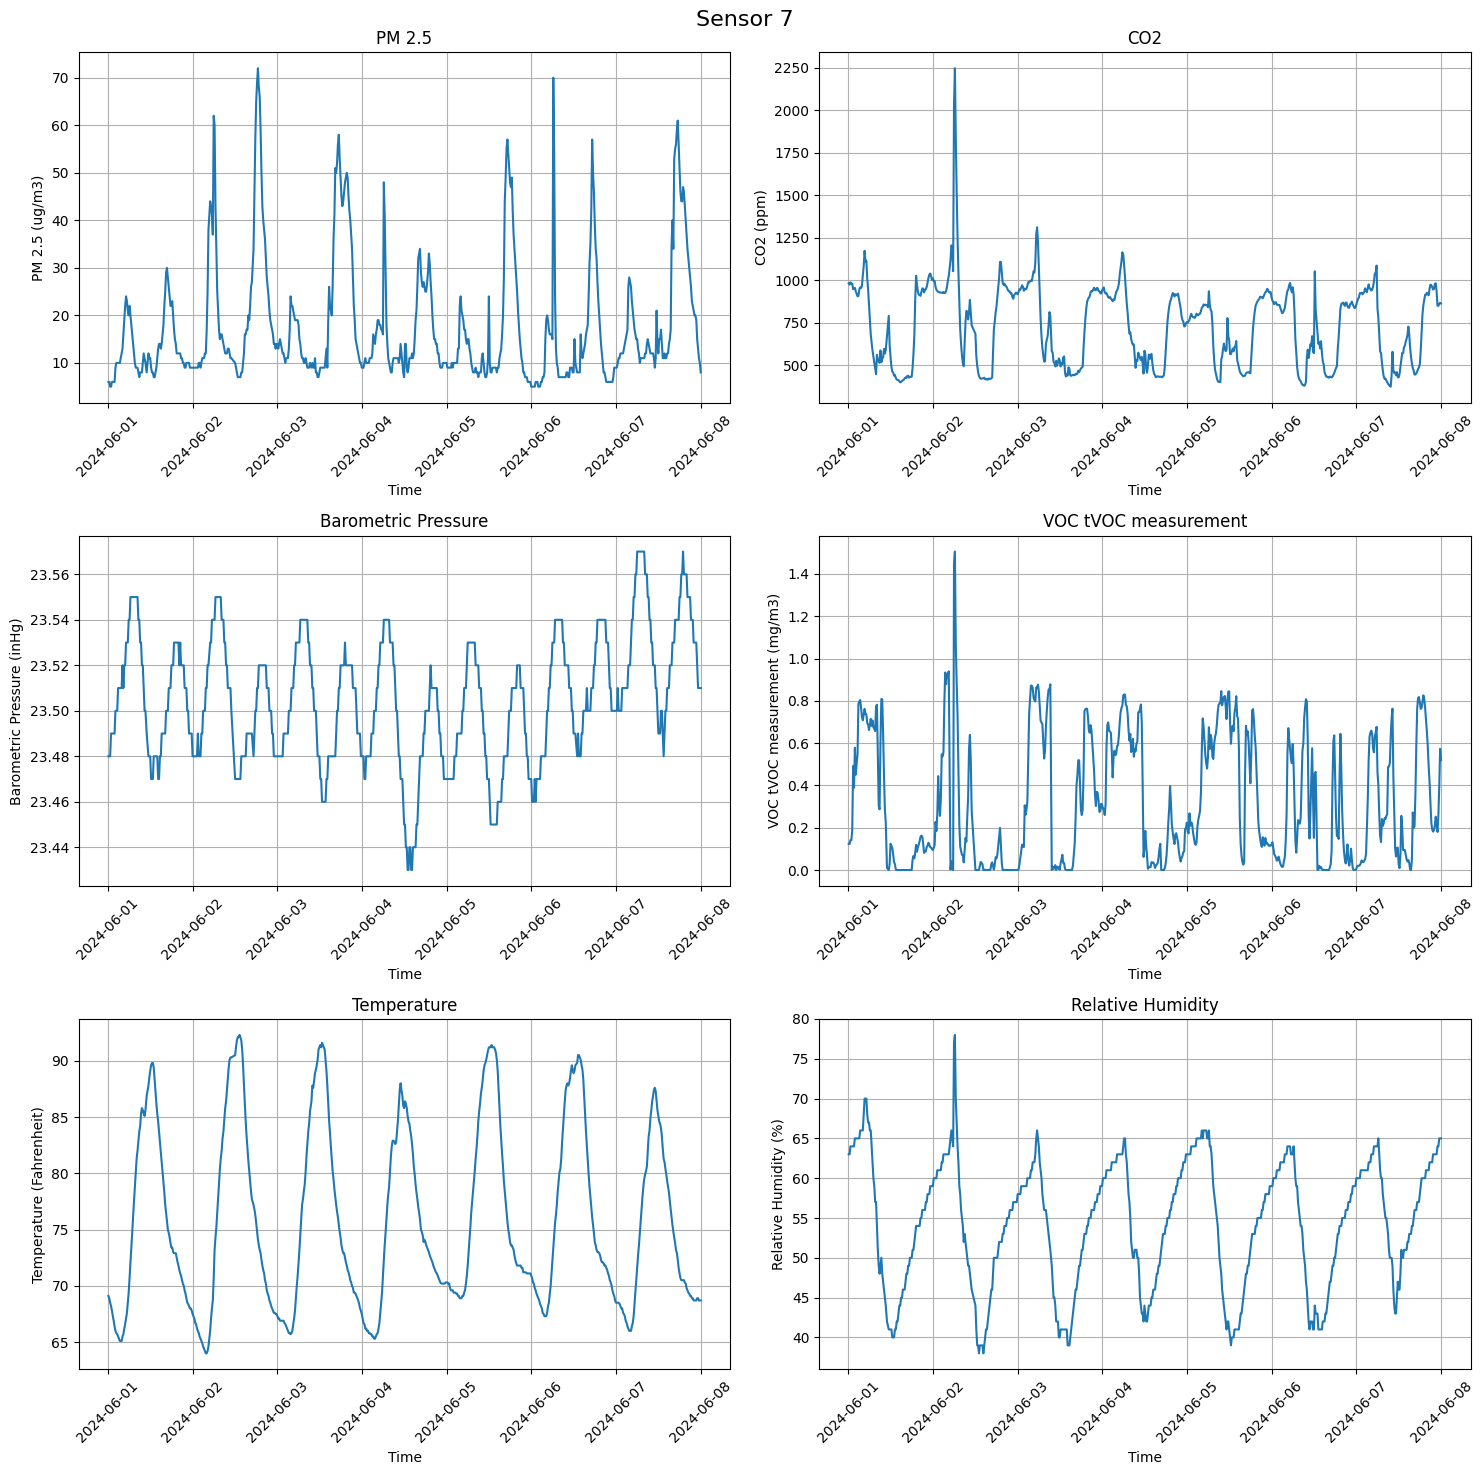

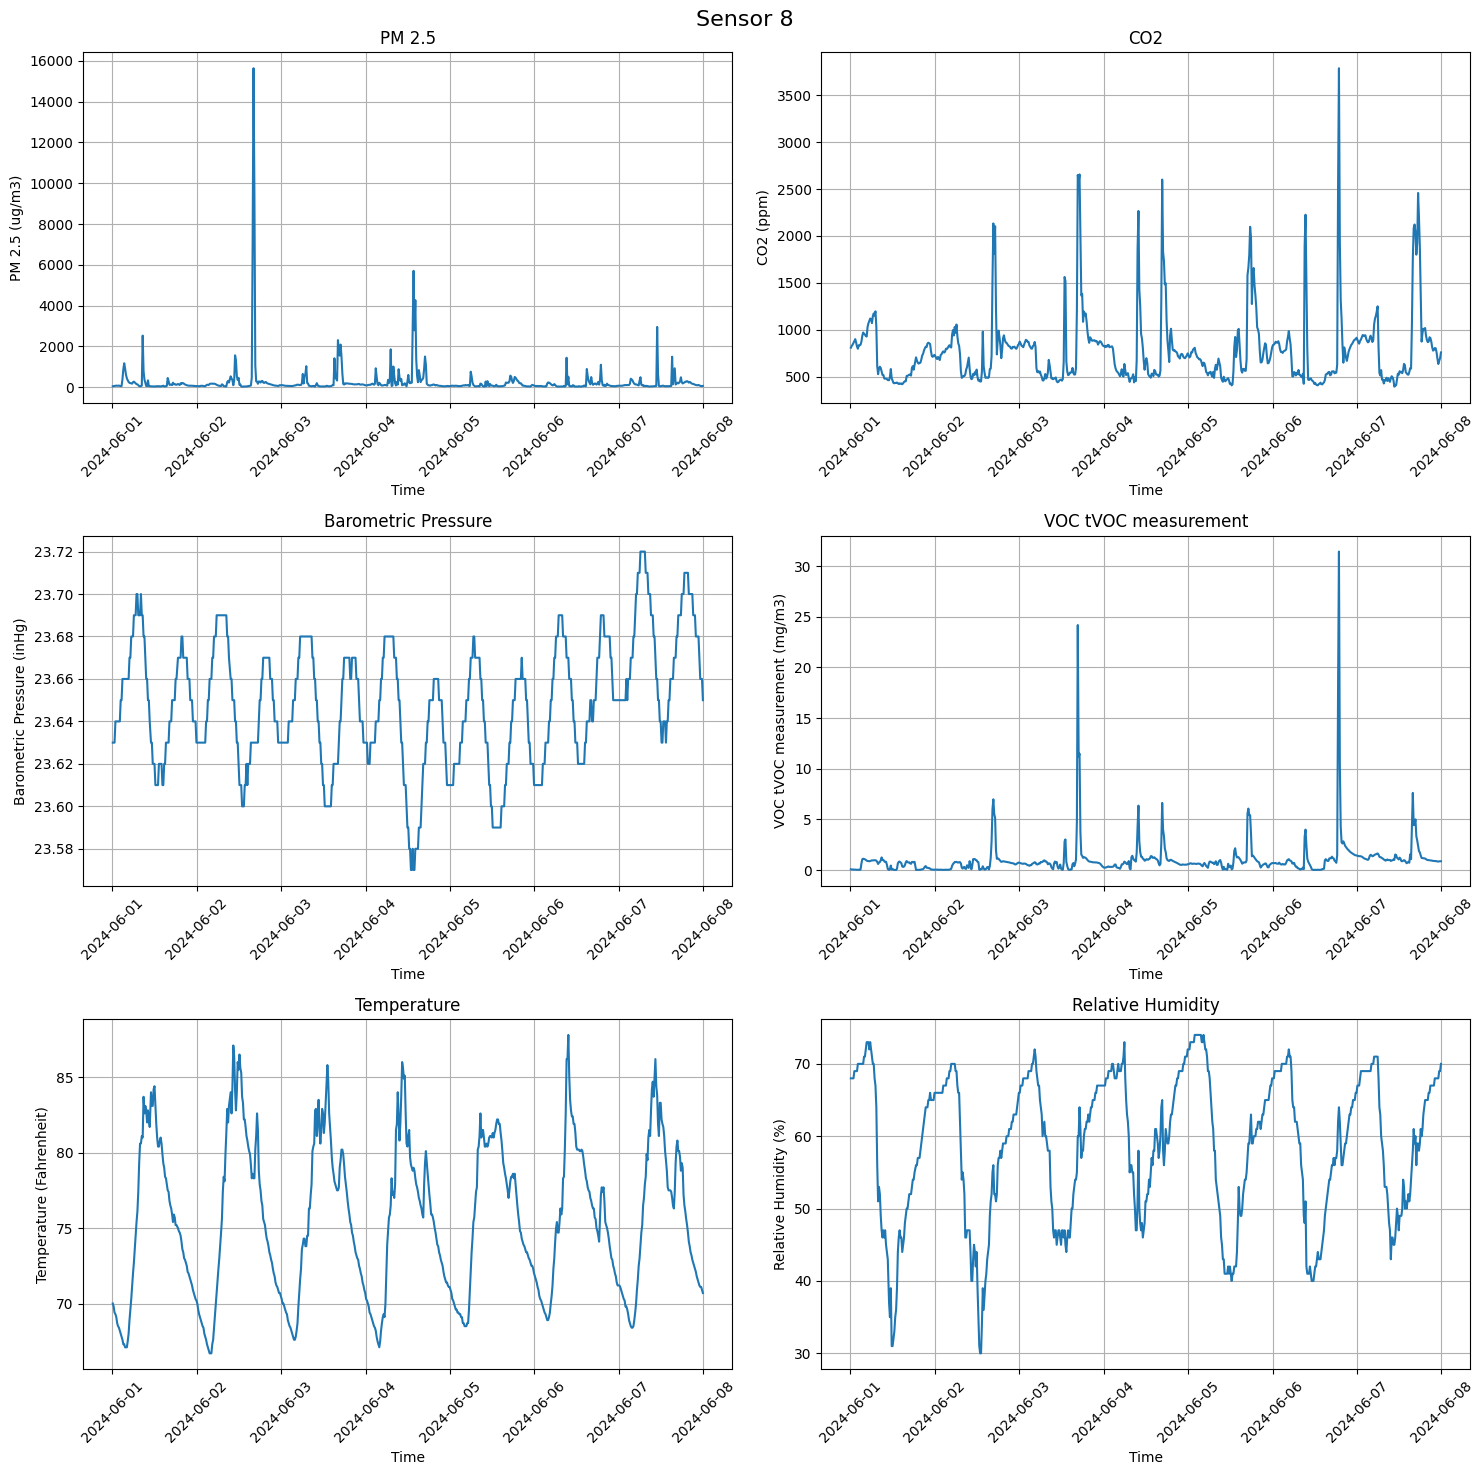

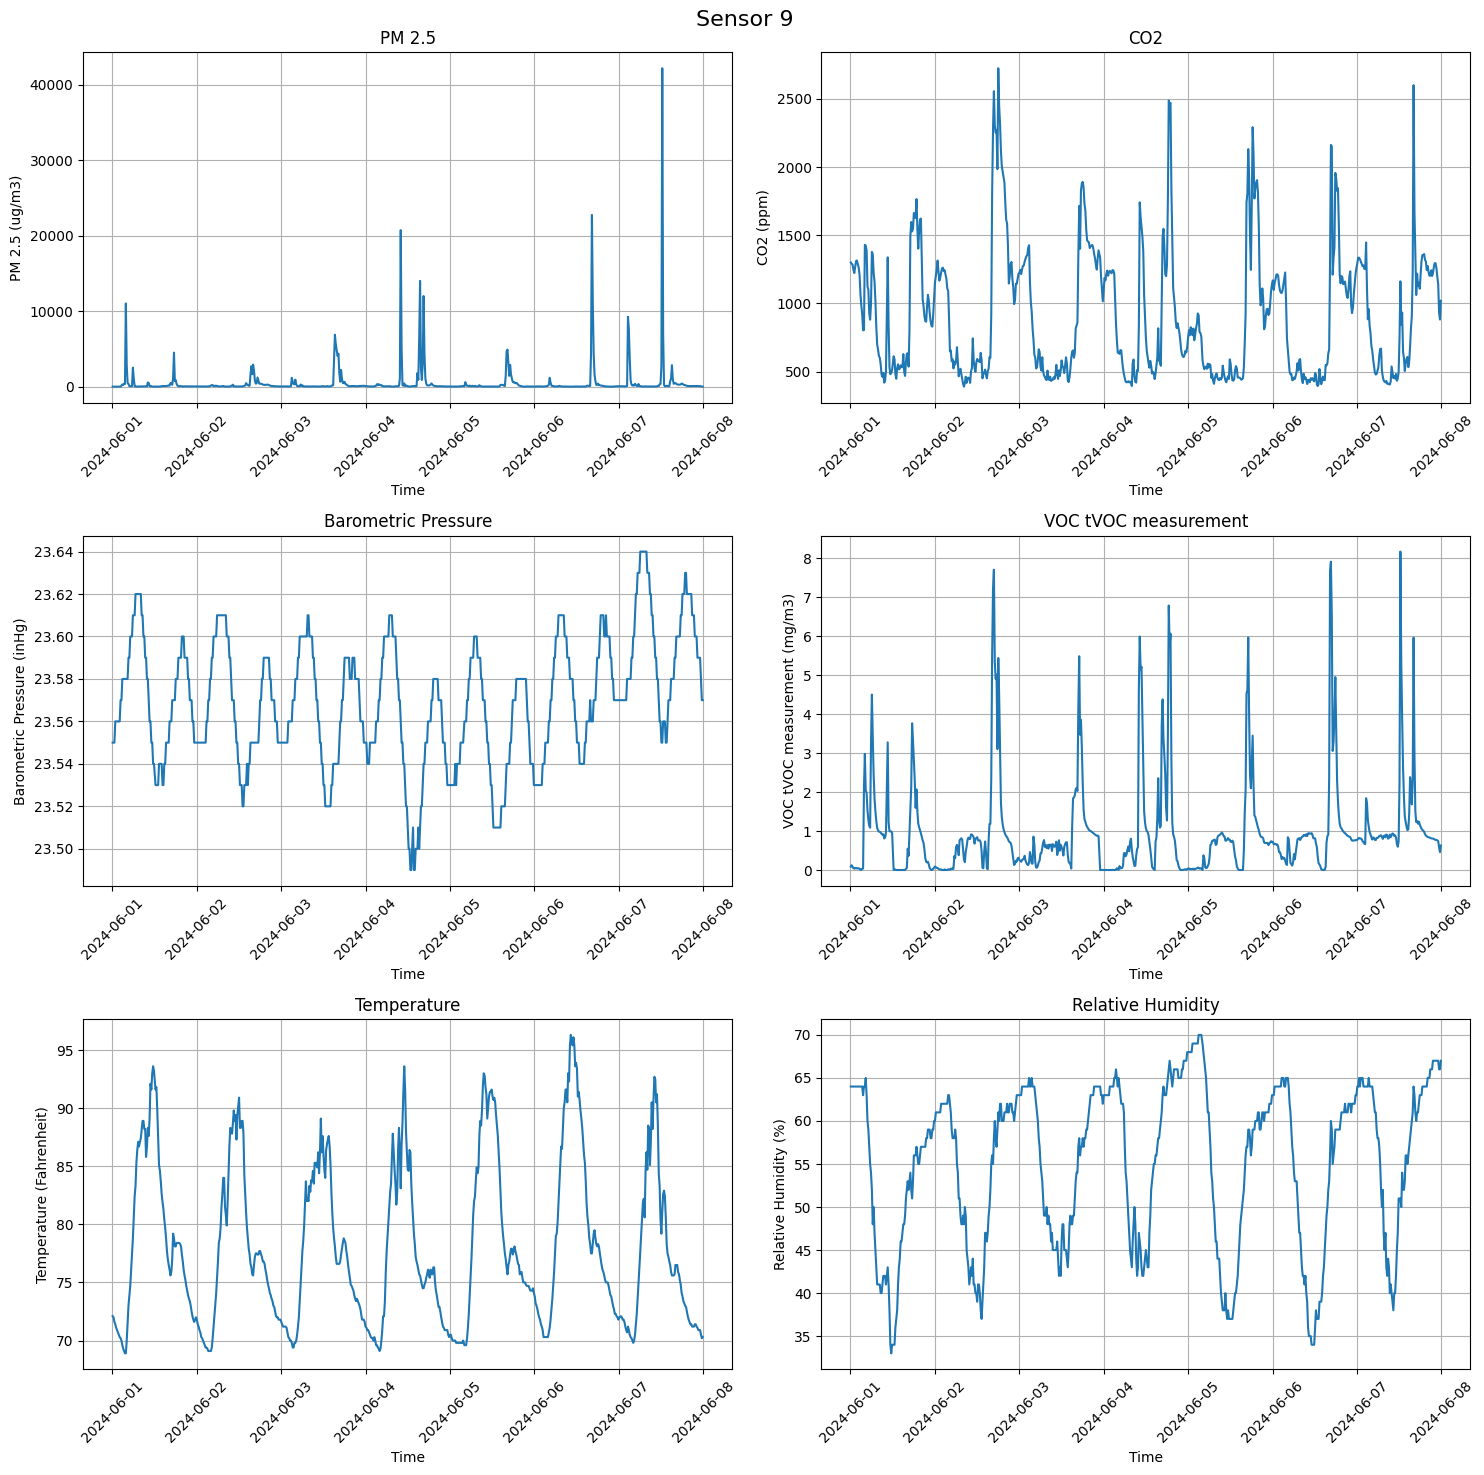

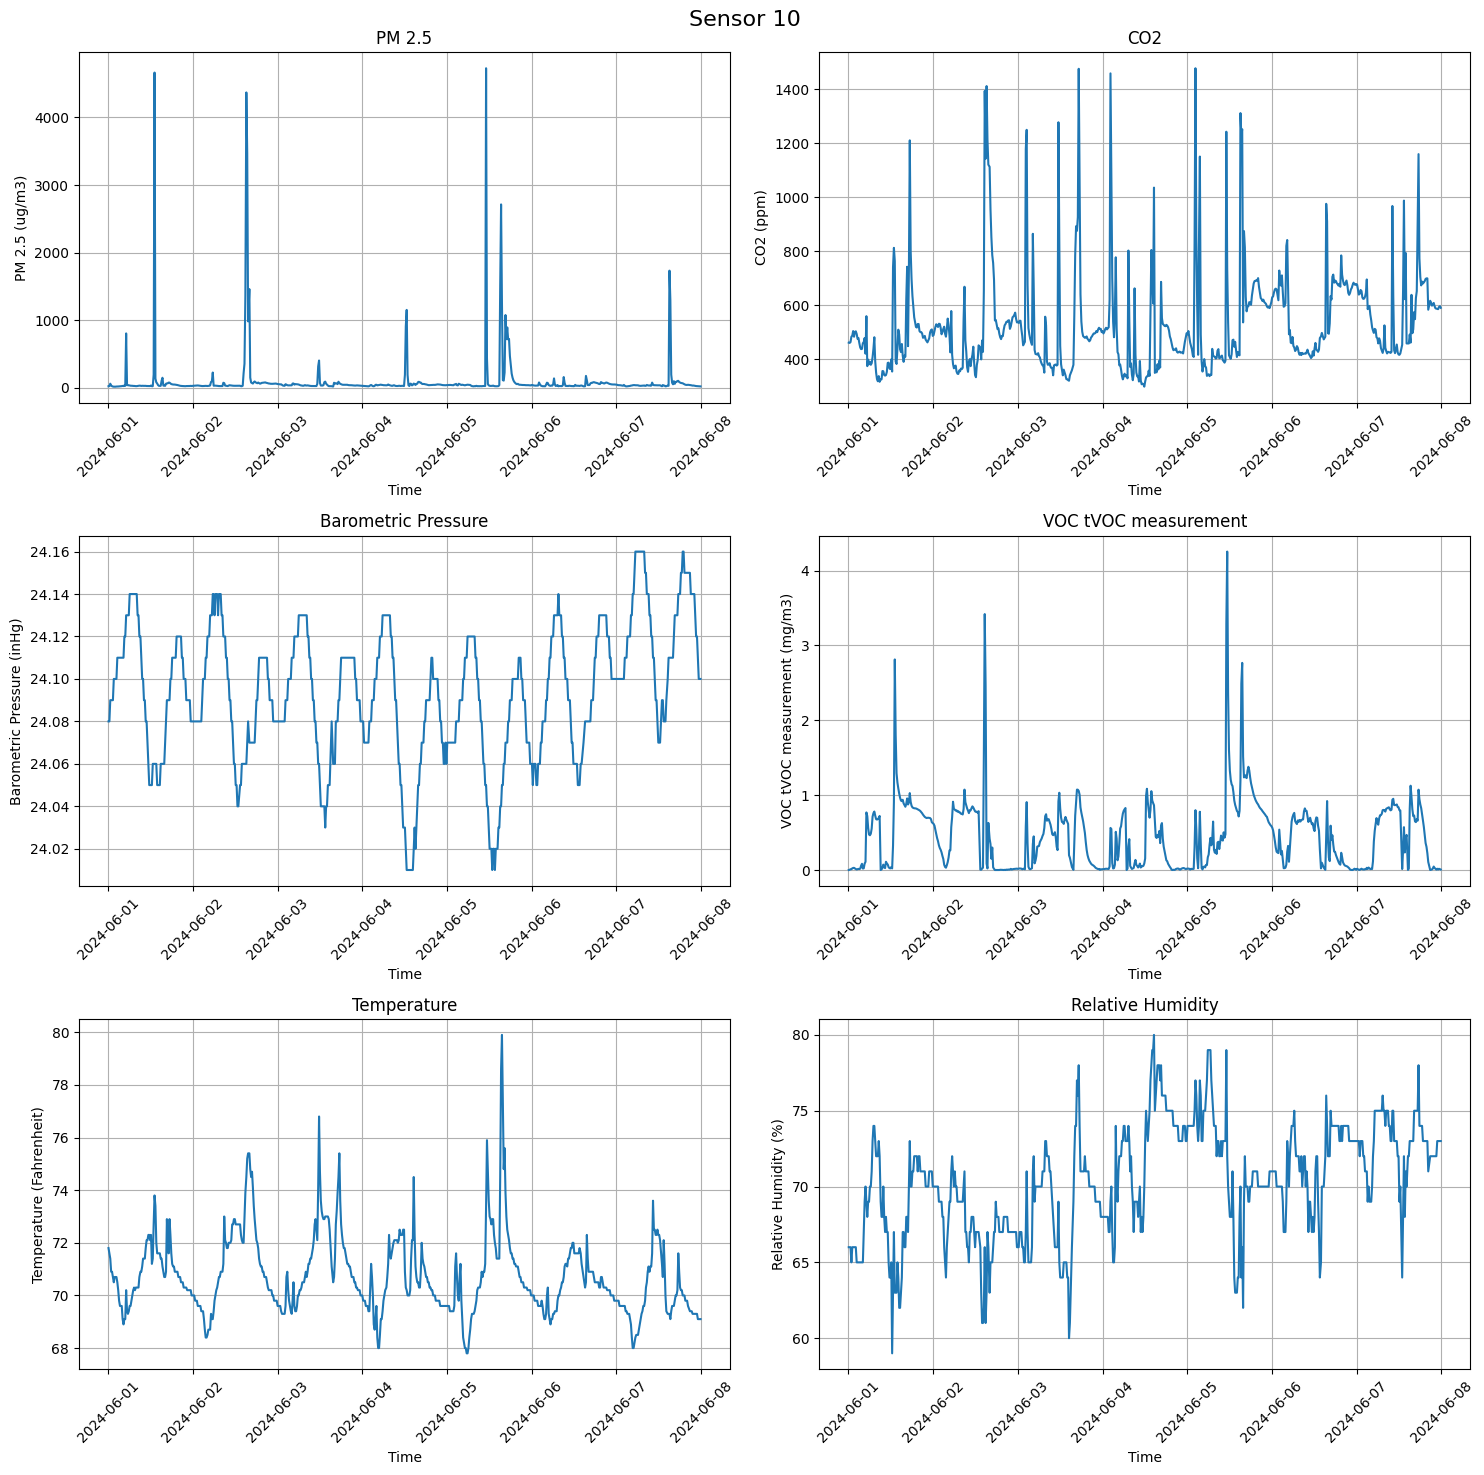

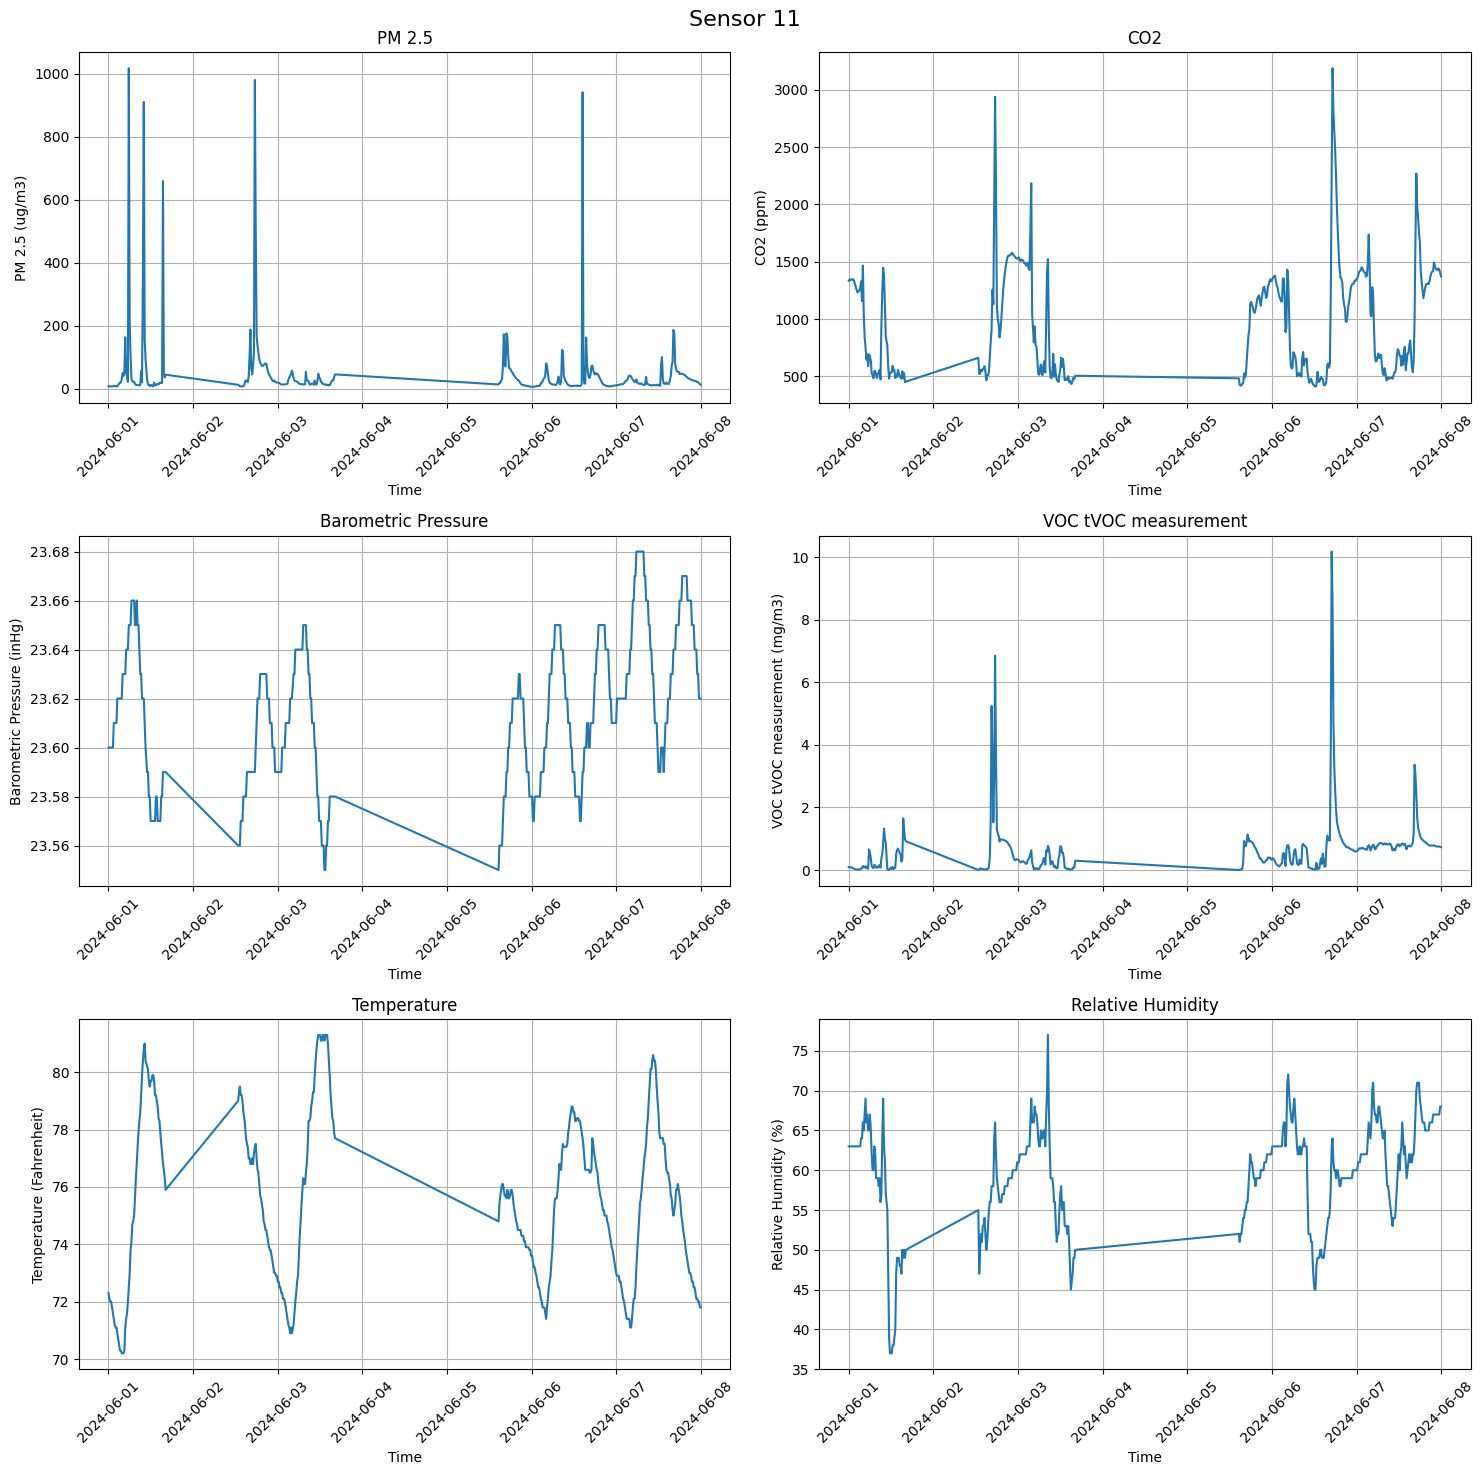

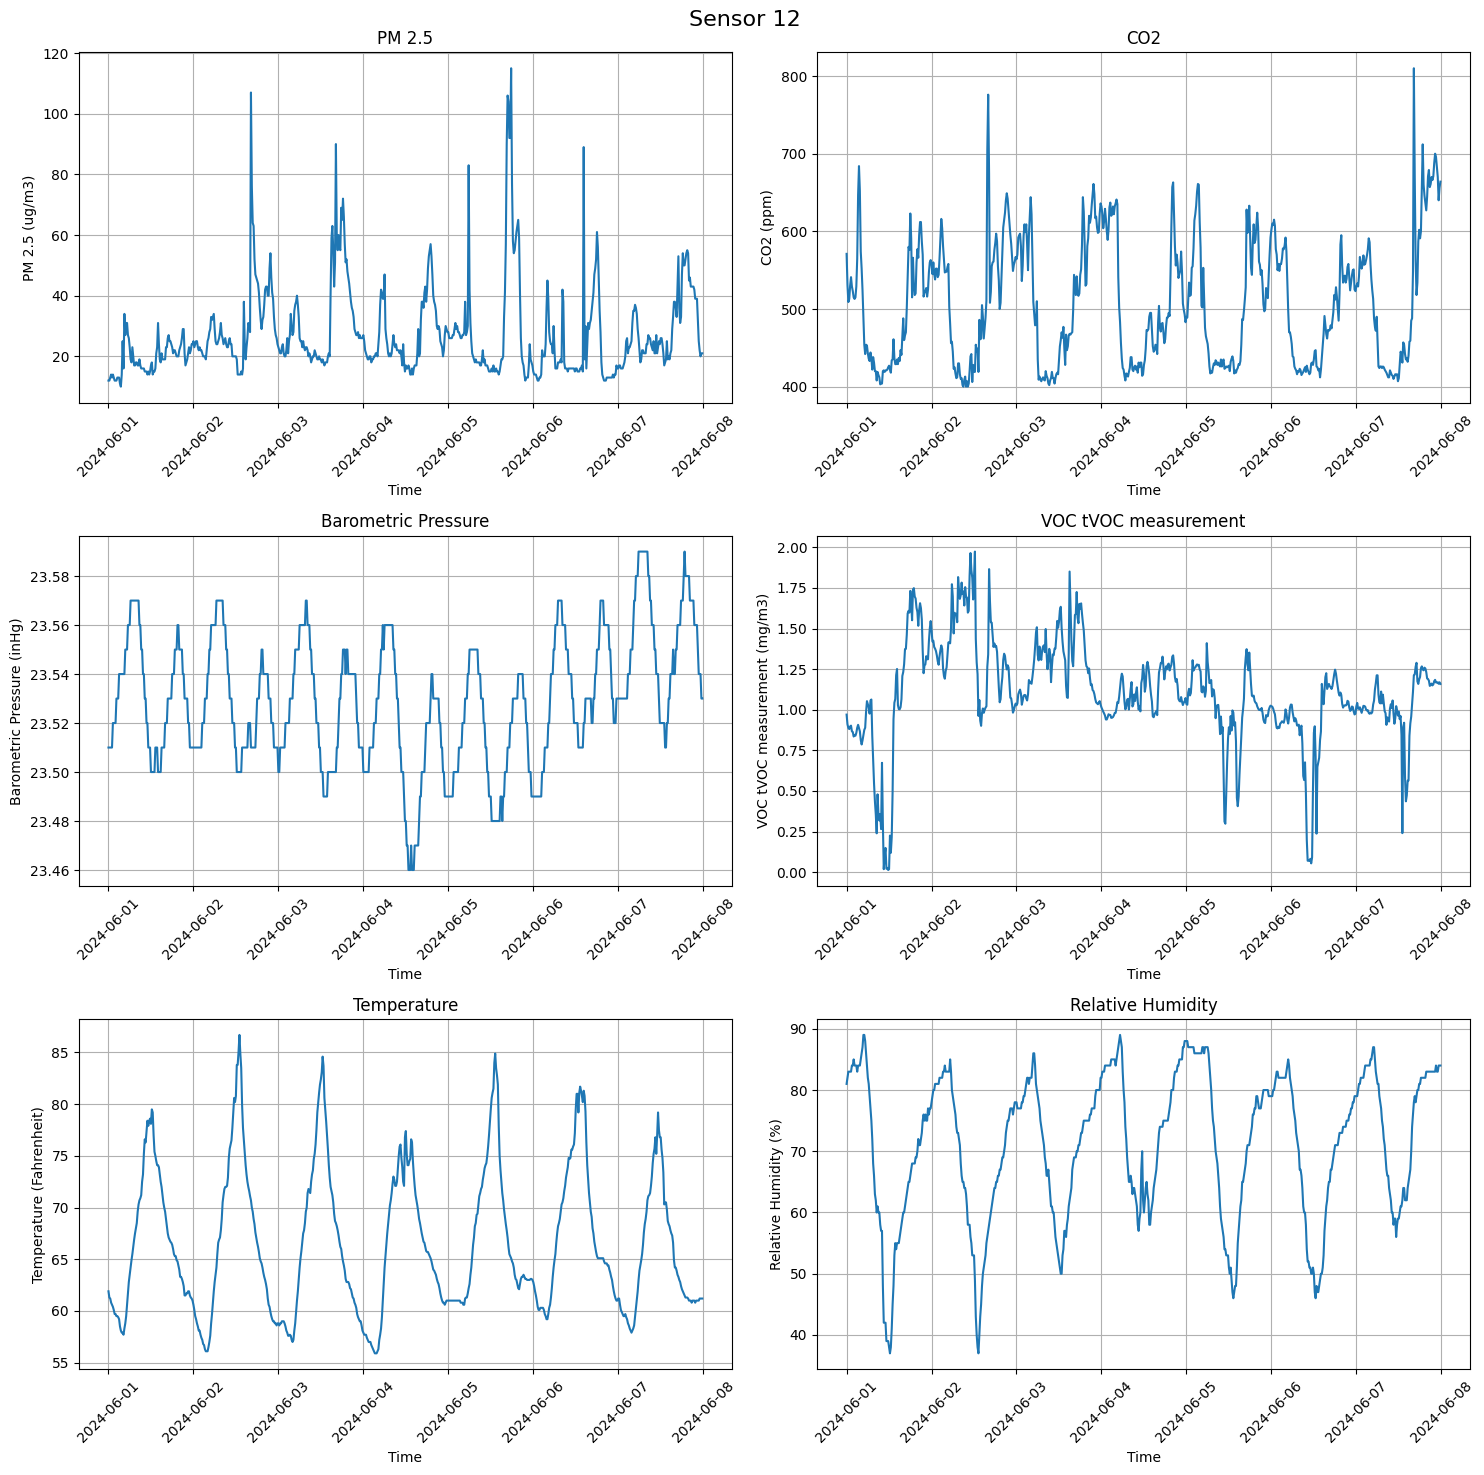

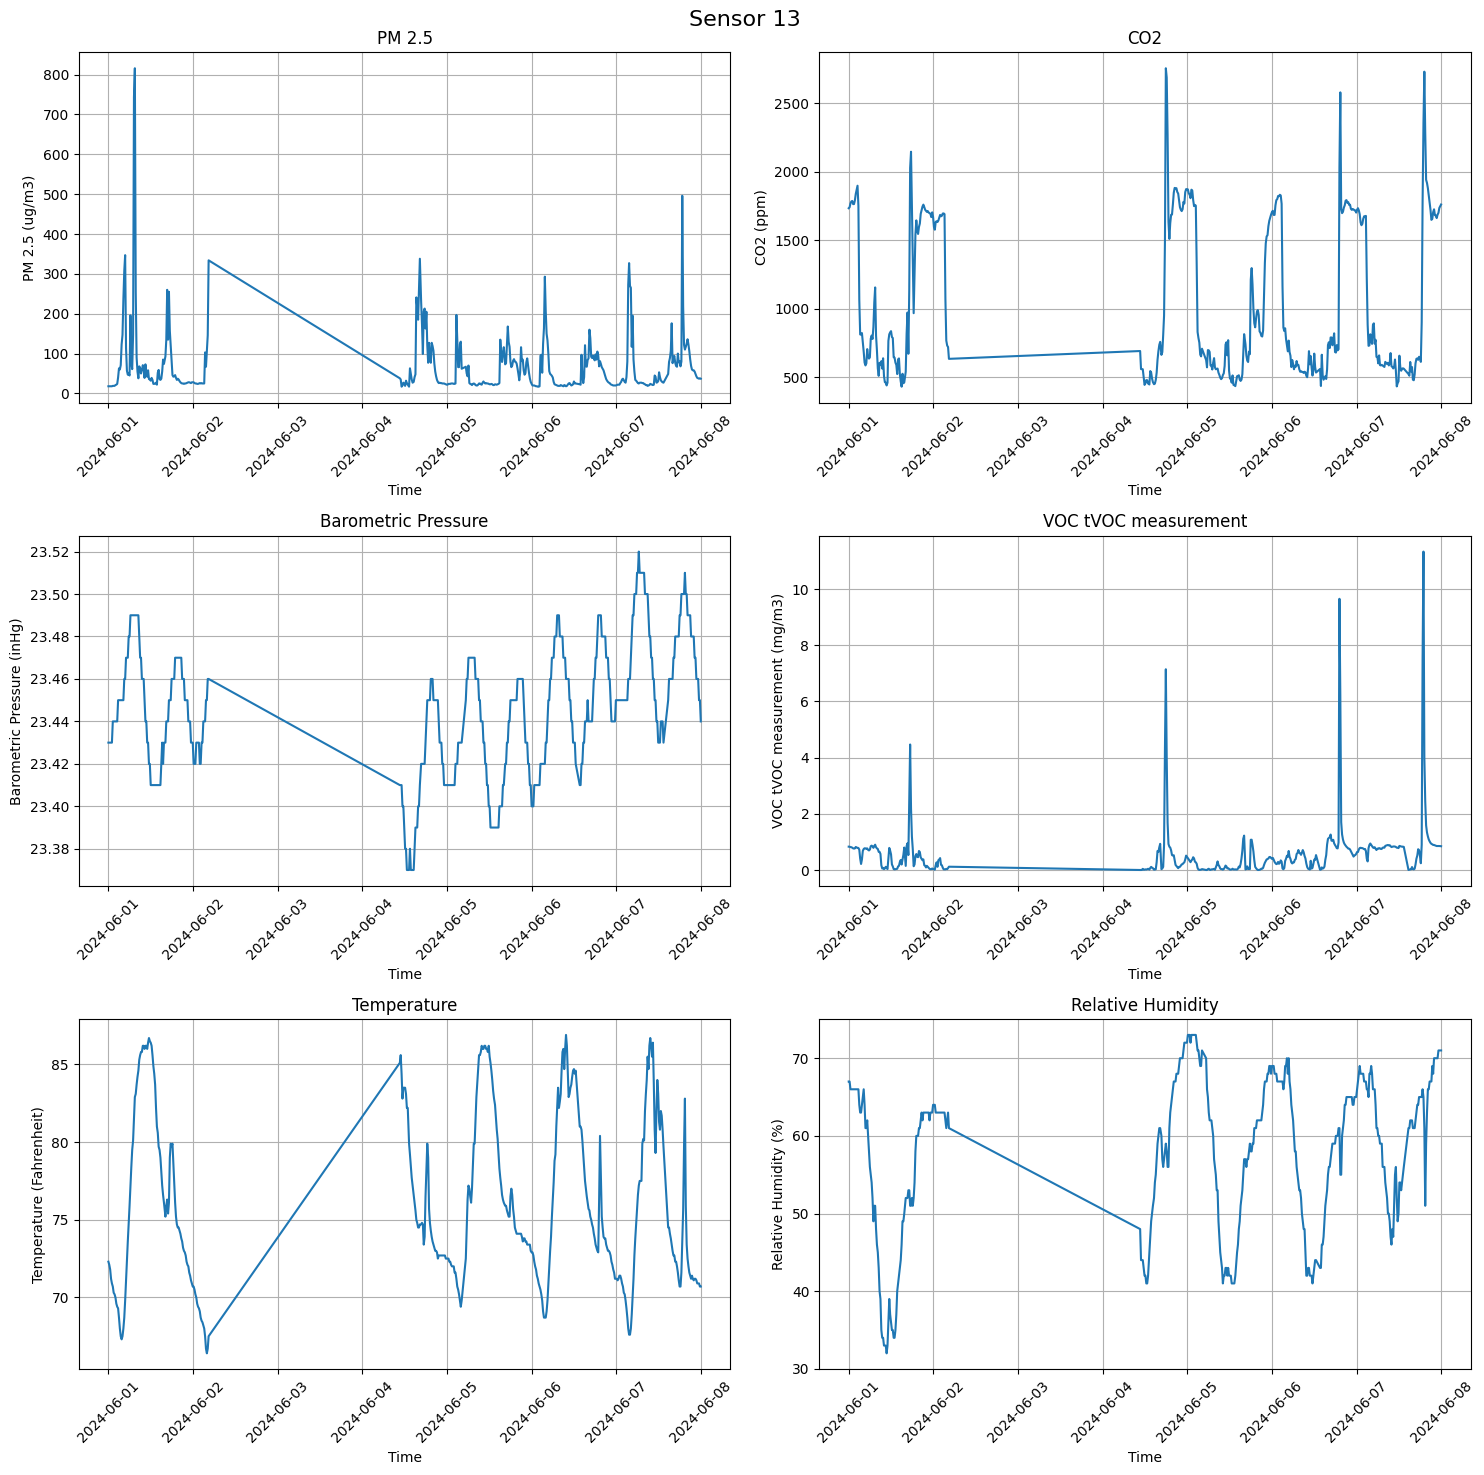

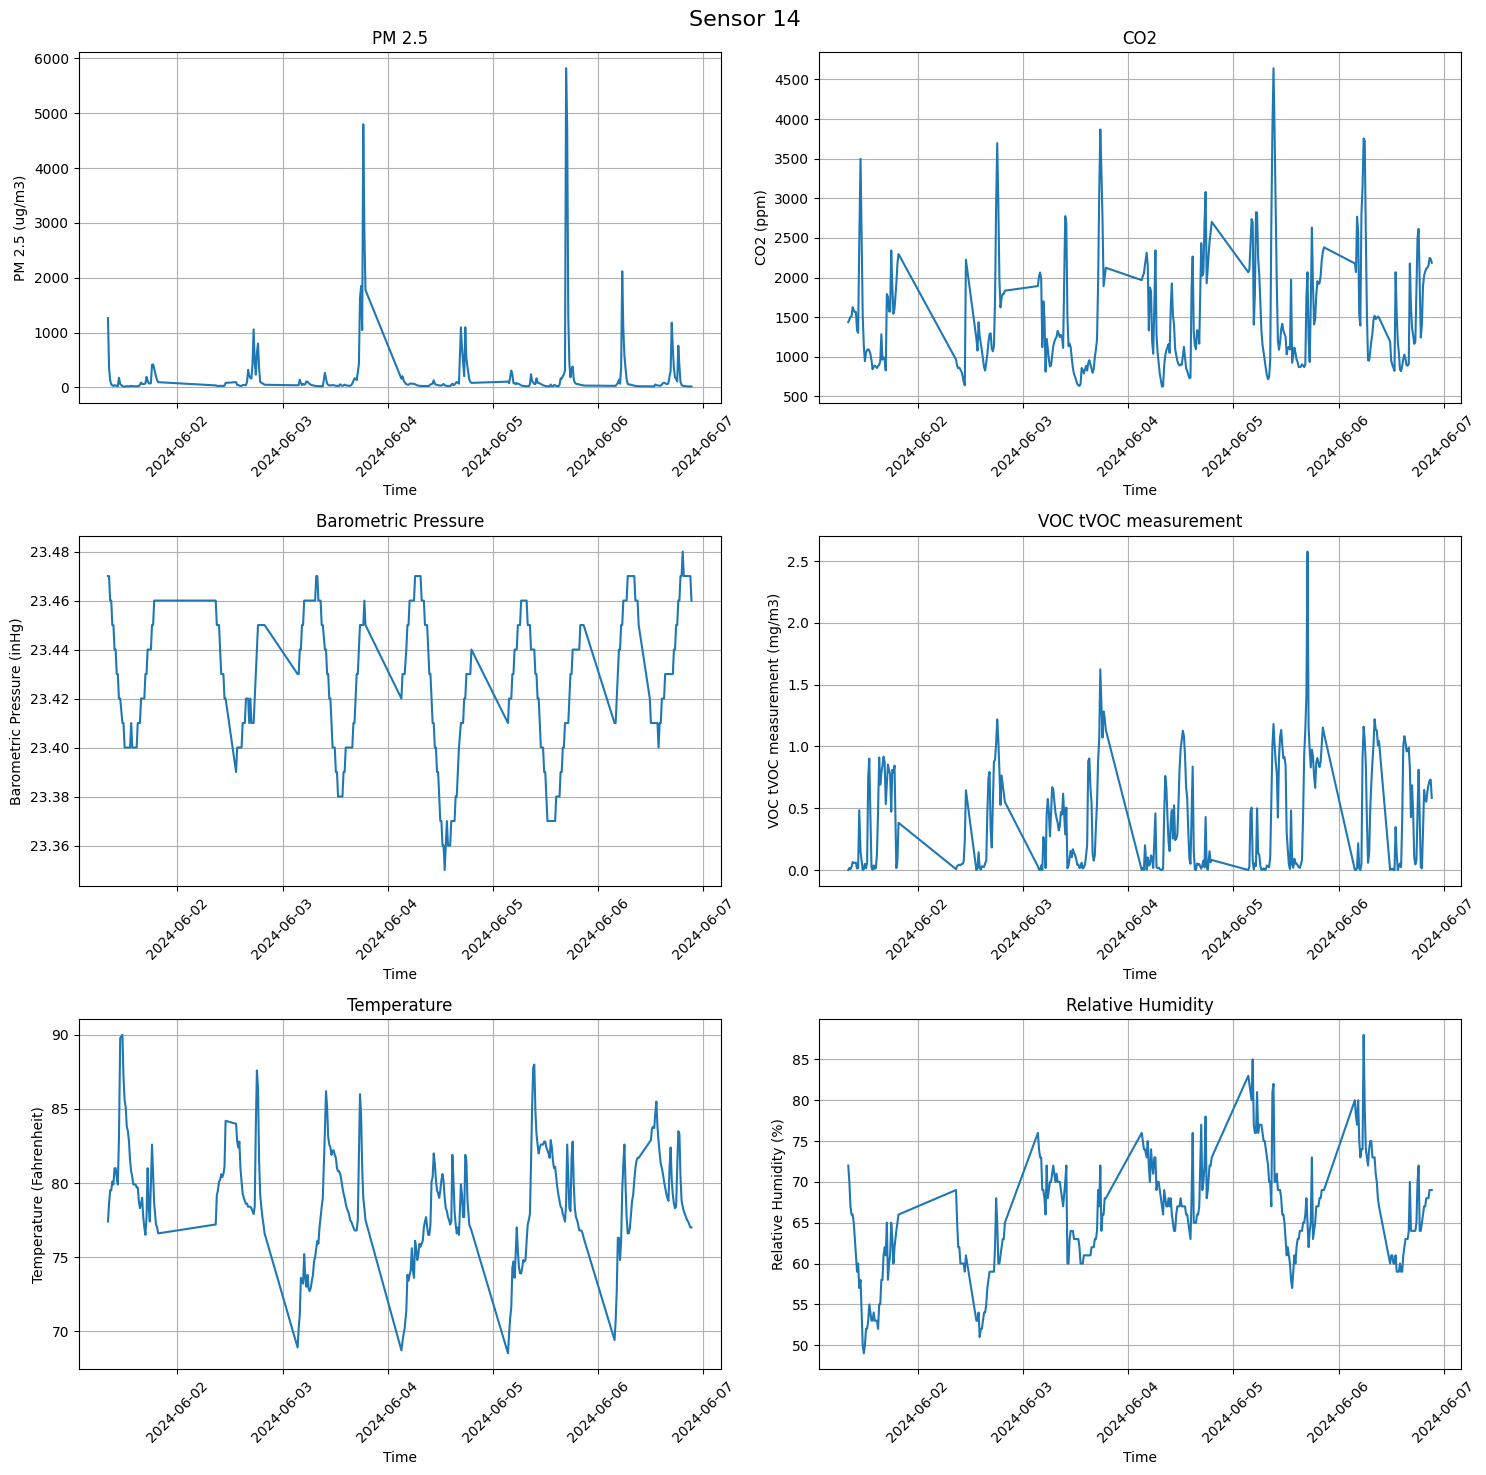

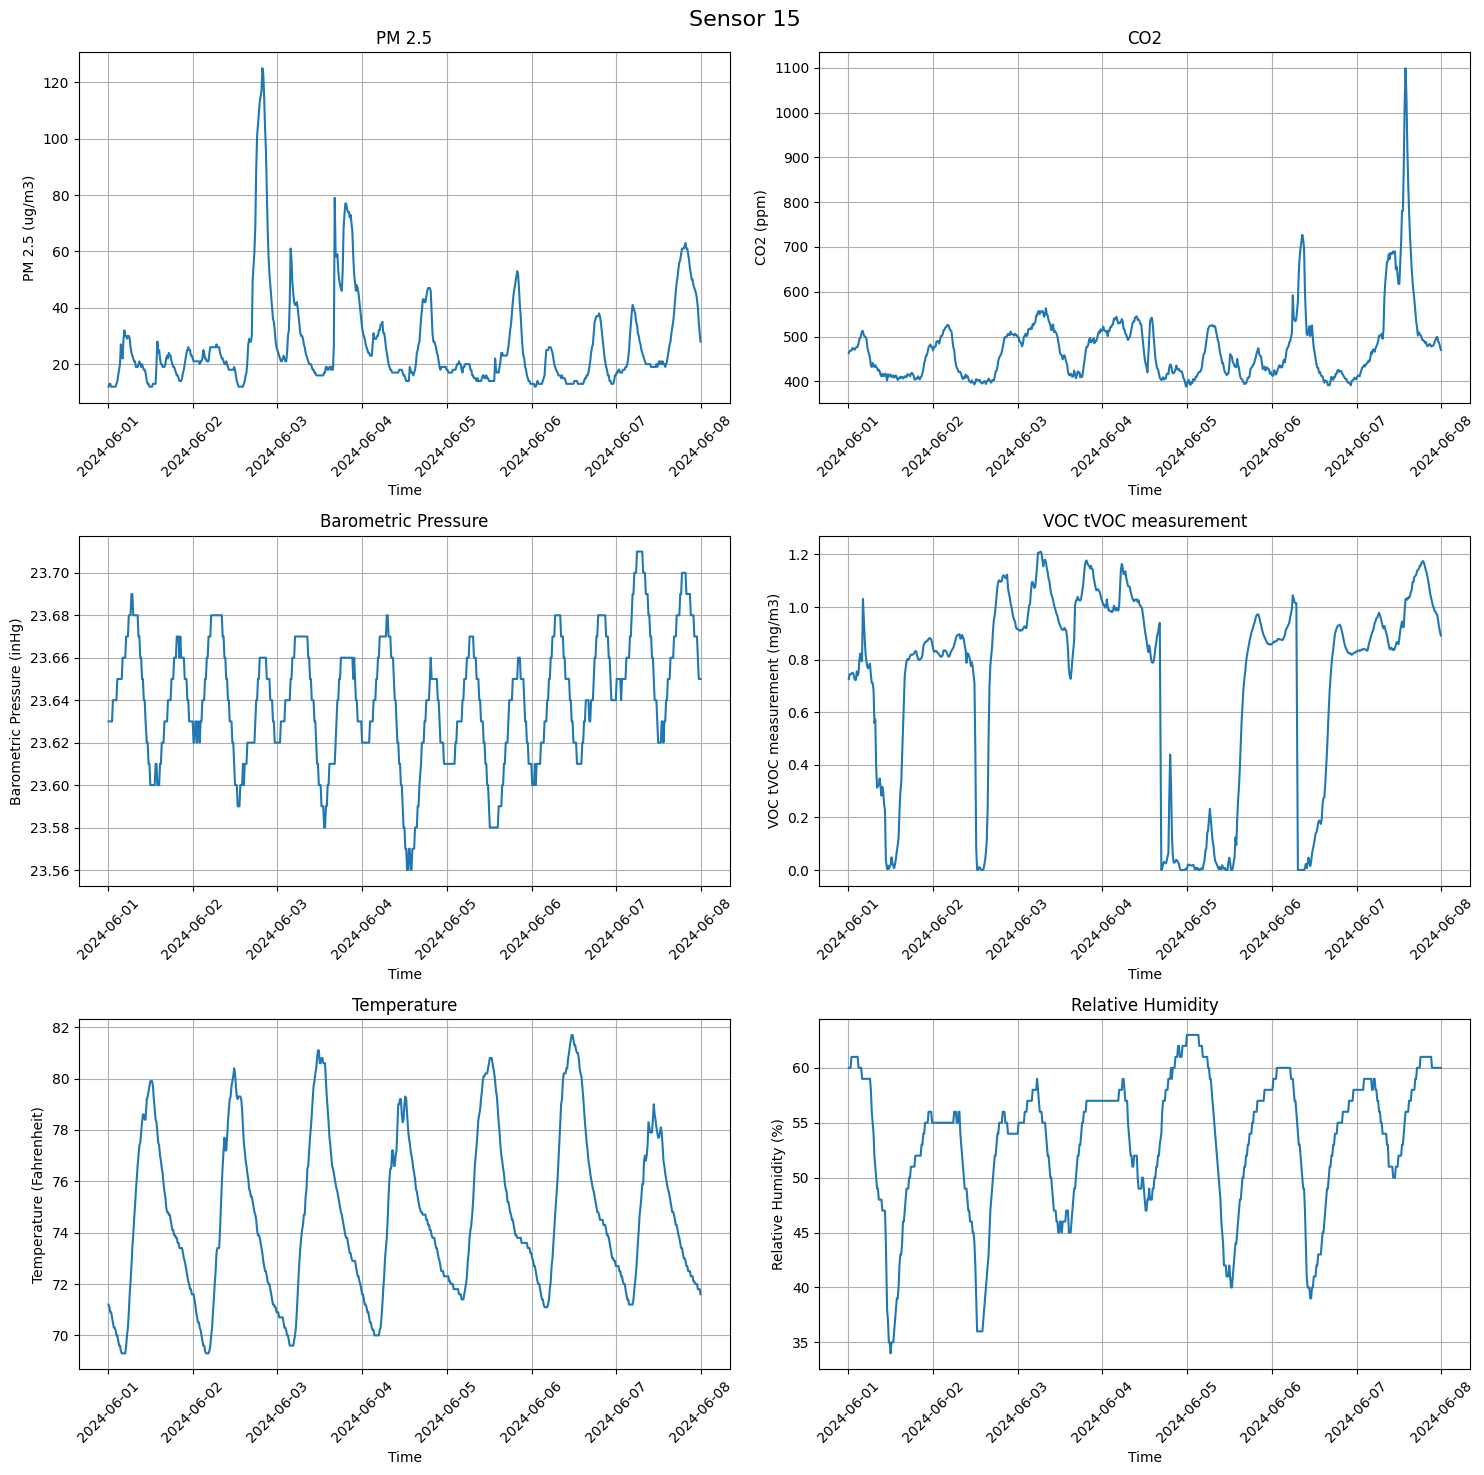

In [63]:
# Define columns to plot
columns_to_plot = ['PM 2.5', 'CO2', 'Barometric Pressure', 'VOC tVOC measurement', 'Temperature', 'Relative Humidity']

num_plots_per_row = 2
for sensor_num, df in enumerate(cleaned_sensor_dataframes):
    num_columns = len(working_columns)
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.suptitle(f"Sensor {sensor_num + 1}", fontsize=16)

    for i, column in enumerate(working_columns):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].plot(df['Timestamp'], df[column])
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column} ({units_dict[column]})')
        axs[row, col].grid(True)
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig(f"Output/Weekly QA-QC/Jun1-Jun7/sensor_{sensor_num + 1}.png")
    plt.show()